## Synthoseis Quick Start Notebook

Synthoseis is an open source, Python-based tool used for generating pseudo-random seismic data. The goal of Synthoseis is to generate realistic seismic data for deep learning training. This notebook will serve as a guide to getting your first Synthoseis model up and running. Future notebooks will discuss seismic outputs, visualizations, and building a custom rock properties model.

### Environment Build

To install the necessary packages, use the `environment.yml` file to create a virtual or conda environment. Please note that the most recent version of Synthoseis has been refactored to work with Python 3.10.

### Imports

Within the main directory of the repo is a script called `main.py`. This is the primary script to run the program. Import `main.py`, along with visualization tools to view the results.

In [8]:
import os
import sys
import pathlib
current_path = pathlib.Path(os.getcwd())
lib_path = current_path.parents[0]
sys.path.append(lib_path.__str__())

In [18]:
import main as mn
import numpy as np
import json
import pprint as pp
import matplotlib.pyplot as plt
from pathlib import Path

### Building your first model

The config json file is the method for defining some of the key aspects of your seismic survey including survey size, seismic bandwith, column height range, number of faults, sand thickness ranges, and the presence of geobodies like salt and channels. Please note that setting `include_channels: True` will signifcantly increase compute time and memory consumption. Below is an example config file that can be found in `./config/example.json`.

In [13]:
rock_model = json.load(open('../config/example.json', 'r'))
pp.pprint(rock_model)

{'bandwidth_high': [20.0, 35.0],
 'bandwidth_low': [3.0, 6.0],
 'bandwidth_ord': 4,
 'basin_floor_fans': False,
 'broadband_qc_volume': False,
 'closure_types': ['simple', 'faulted', 'onlap'],
 'cube_shape': [300, 300, 1250],
 'digi': 4,
 'dip_factor_max': 2,
 'extra_qc_plots': True,
 'incident_angles': [7, 15, 24],
 'include_channels': False,
 'include_salt': True,
 'infill_factor': 10,
 'initial_layer_stdev': [7.0, 25.0],
 'max_column_height': [150.0, 150.0],
 'max_number_faults': 6,
 'min_closure_voxels_faulted': 2500,
 'min_closure_voxels_onlap': 500,
 'min_closure_voxels_simple': 500,
 'min_number_faults': 1,
 'model_qc_volumes': True,
 'multiprocess_bp': True,
 'pad_samples': 10,
 'partial_voxels': True,
 'project': 'example',
 'project_folder': '/scratch/synthoseis_example',
 'sand_layer_fraction': {'max': 0.25, 'min': 0.05},
 'sand_layer_thickness': 2,
 'seabed_min_depth': [20, 50],
 'signal_to_noise_ratio_db': [7.5, 12.5, 17.5],
 'thickness_max': 12,
 'thickness_min': 2,
 'var

### Running the model

Once you've defined the parameters of your seismic data, call the `build_model()` function in `main.py`. This will take the config `.json` file as an input, as well as a `run_id` defined by the user. Users also have the option to use `test_mode`. Test mode can take an integer as an input and returns a smaller seismic volume than defined in the config file. This is great for testing prior to running the full size model.

In [14]:
mn.build_model(user_json='../config/example.json', run_id=1,test_mode=50)

------------------------------------
Testing Mode
Output Folder: /scratch/synthoseis_example_test_mode_
Cube_Shape: (50, 50, 1250)
------------------------------------
No coherent noise will be inserted
Salt will be inserted. noise_stretch_factor = 1.21

Model folder: /scratch/synthoseis_example_test_mode_/seismic__2024.61445259_1
Creating directory: /scratch/synthoseis_example_test_mode_
Creating directory: /scratch/synthoseis_example_test_mode_/seismic__2024.61445259_1
Creating directory: /scratch/temp_folder__2024.61445259_1_1__2024.61445259

Keyfile created at /scratch/synthoseis_example_test_mode_/seismic__2024.61445259_1/seismicCube_2024.61445259.key
self.cfg.num_lyr_lut =  25000
onlap_layer_list =  [ 10  28  32 125 175 197]
Number of onlapping flags: 6
 ... horizon number for first onlap episode = 10
 ... number of channelFlags: 0
 ... horizon number for first channel episode: 0
	Indices for shallowest point in cube: 38, 4
Building random depth map at base of model
azi, dip, dip

  0%|          | 0/5 [00:00<?, ?it/s]



 ... inserting fault 0 with throw 5.13
   ... fault ellipsoid semi-axes (a, b, c): 232.52, 347.07, 5403.79
   ... fault ellipsoid origin (x, y, z): 266.00, 21.67, -300.10
   ... tilt_pct: 39.78
   ...z for bottom of ellipsoid at depth (samples) = -1621668.0
   ...shape of output_cube = (50, 50, 1260)
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.0
   ...gouge_pctile (percent*100) = 38.87169425465298
   .... output_cube.shape = (50, 50, 1260)
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)
   ... Computing fault middle to hang max displacement function
    ... x idx for max displacement  =  42
    ... y idx for max displacement  =  9
    ... z idx for max displacement  =  111
    ... ellipsoid value  =  1.0073340164693225
    ... Computing fault depth at max displacement
    ... depth at max displacement  = 111
    ... This fault has  2.4% of downthrown samples
   ... Taper fault so it doesn't reach seabed
    ... Sea floor max 

 20%|██        | 1/5 [00:03<00:15,  3.82s/it]

   ...hockey_sticks = , [0]


 ... inserting fault 1 with throw 24.16
   ... fault ellipsoid semi-axes (a, b, c): 236.66, 325.86, 5403.79
   ... fault ellipsoid origin (x, y, z): -204.89, 22.03, -300.10
   ... tilt_pct: 35.21
   ...z for bottom of ellipsoid at depth (samples) = -1621668.0
   ...shape of output_cube = (50, 50, 1260)
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.5
   ...gouge_pctile (percent*100) = 62.461455995109176
   .... output_cube.shape = (50, 50, 1260)
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)
   ... Computing fault middle to hang max displacement function
    ... x idx for max displacement  =  14
    ... y idx for max displacement  =  21
    ... z idx for max displacement  =  251
    ... ellipsoid value  =  0.0
    ... Computing fault depth at max displacement
    ... depth at max displacement  = 251
    ... This fault has 11.8% of downthrown samples
   ... Taper fault so it doesn't reach seabed
    .

 40%|████      | 2/5 [00:07<00:12,  4.02s/it]

   ...hockey_sticks = , [0, 0]


 ... inserting fault 2 with throw 31.99
   ... fault ellipsoid semi-axes (a, b, c): 223.32, 360.87, 5403.79
   ... fault ellipsoid origin (x, y, z): 244.27, 20.75, -300.10
   ... tilt_pct: 35.05
   ...z for bottom of ellipsoid at depth (samples) = -1621668.0
   ...shape of output_cube = (50, 50, 1260)
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.5
   ...gouge_pctile (percent*100) = 77.70720125462219
   .... output_cube.shape = (50, 50, 1260)
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)
   ... Computing fault middle to hang max displacement function
    ... x idx for max displacement  =  37
    ... y idx for max displacement  =  28
    ... z idx for max displacement  =  233
    ... ellipsoid value  =  0.0
    ... Computing fault depth at max displacement
    ... depth at max displacement  = 233
    ... This fault has  9.7% of downthrown samples
   ... Taper fault so it doesn't reach seabed
    

 60%|██████    | 3/5 [00:12<00:08,  4.45s/it]

   ...hockey_sticks = , [0, 0, 1]


 ... inserting fault 3 with throw 18.98
   ... fault ellipsoid semi-axes (a, b, c): 210.51, 336.87, 5403.79
   ... fault ellipsoid origin (x, y, z): -192.61, 18.73, -300.10
   ... tilt_pct: 37.54
   ...z for bottom of ellipsoid at depth (samples) = -1621668.0
   ...shape of output_cube = (50, 50, 1260)
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.5
   ...gouge_pctile (percent*100) = 64.96240838876292
   .... output_cube.shape = (50, 50, 1260)
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)
   ... Computing fault middle to hang max displacement function
    ... x idx for max displacement  =  5
    ... y idx for max displacement  =  21
    ... z idx for max displacement  =  185
    ... ellipsoid value  =  0.0
    ... Computing fault depth at max displacement
    ... depth at max displacement  = 185
    ... This fault has  3.8% of downthrown samples
   ... Taper fault so it doesn't reach seabed
 

 80%|████████  | 4/5 [00:17<00:04,  4.50s/it]

   ...hockey_sticks = , [0, 0, 1, 0]


 ... inserting fault 4 with throw 7.27
   ... fault ellipsoid semi-axes (a, b, c): 234.02, 332.22, 5403.79
   ... fault ellipsoid origin (x, y, z): 325.01, 20.29, -300.10
   ... tilt_pct: 37.40
   ...z for bottom of ellipsoid at depth (samples) = -1621668.0
   ...shape of output_cube = (50, 50, 1260)
   ...infill_factor, pad_samples = 10, 10
   ...shear_zone_width (samples) = 1.0
   ...gouge_pctile (percent*100) = 80.37084851008777
   .... output_cube.shape = (50, 50, 1260)
   .... (np.arange(output_cube.shape[2])*infill_factor).shape = (1260,)


100%|██████████| 5/5 [00:17<00:00,  3.60s/it]

    ... Empty intersection between fault and cube, assign d-max at cube lower corner
  ... Ellipsoid larger than cube no fault inserted
   ... interpolation = False


   ... elapsed time for skimage.label = 0:00:00.021403
   ... number_fault_intersections = 0
	   ... Cube parameters going into interpolation
	   ... Origtime shape  = 1260
	   ... stretch_times_effects shape  = (50, 50, 1260)
	   ... unstretch_times shape  = (50, 50, 1260)
	   ... traces shape  = (50, 50, 1260)
	   ... Cube parameters going into interpolation
	   ... Origtime shape  = 1260
	   ... stretch_times_effects shape  = (50, 50, 1260)
	   ... unstretch_times shape  = (50, 50, 1260)
	   ... traces shape  = (50, 50, 1260)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  198 (0,) (230,)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  197 (0,) (1913,)
 ... ihor, improved_map_onlap_segments[improved_map_onlap_segments>0.].shape, improved_zmap_thickness[improved_zmap_thickness==0].shape =  196 (0,) (1825,

/glb/data/geocrawler2/users/usgvat/Developer/synthoseis/datagenerator/Closures.py:3283: UserWarning:

Only one label was provided to `remove_small_objects`. Did you mean to use a boolean array?




    ... layer 23,
	top structure map min, max 183.83, 333.22
	closure_depth_map min, max 183.83 333.22288100638076
    ... layer 23, max_closure 2
	... (2) layer: 23, max_closure; 2, top structure map min, max: 183.82892746872676, 333.22288100638076, closure map min, max: 183.82892746872676, 333.22288100638076
    ... max_closure: 2
    ... finished putting closures in closures_segments for layer ... 23

...closure voxels computation for layer 24 in horizon list.
 ...inside create_closure_labels_from_depth_maps... ihorizon =  24
   ...avg depth for layer 24. 282.56101844242556
   ...maximum column height for layer 24. 37.5
  ...inside _flood_fill: i, initial_size, final_size =  2 50 50

    ... layer 24,
	top structure map min, max 187.92, 336.63
	closure_depth_map min, max 187.92 336.63163702790723
    ... layer 24, max_closure 2
	... (2) layer: 24, max_closure; 2, top structure map min, max: 187.91535990106564, 336.63163702790723, closure map min, max: 187.91535990106564, 336.631637

Calculating Zoeppritz for 5 angles: 100%|██████████| 50/50 [00:07<00:00,  6.29it/s]



...adding random noise to 5 cubes...
S/N ratio = 9.3001
	...Normalised noise3d for angle 0:	Min: -0.0460, mean: 0.0000, max: 0.0452, std: 0.0045
	S/N ratio = 9.3 dB.
	std_ratio = 2.9174
	data_std = 0.0131
	noise_std = 0.0141
	...Normalised noise3d for angle 7:	Min: -0.0368, mean: 0.0000, max: 0.0397, std: 0.0045
	S/N ratio = 9.3 dB.
	std_ratio = 2.9174
	data_std = 0.0131
	noise_std = 0.0101
	...Normalised noise3d for angle 15:	Min: -0.0373, mean: 0.0000, max: 0.0401, std: 0.0045
	S/N ratio = 9.3 dB.
	std_ratio = 2.9174
	data_std = 0.0131
	noise_std = 0.0101
	...Normalised noise3d for angle 24:	Min: -0.0438, mean: -0.0000, max: 0.0463, std: 0.0045
	S/N ratio = 9.3 dB.
	std_ratio = 2.9174
	data_std = 0.0131
	noise_std = 0.0119
	...Normalised noise3d for angle 45:	Min: -0.0416, mean: 0.0000, max: 0.0442, std: 0.0045
	S/N ratio = 9.3 dB.
	std_ratio = 2.9174
	data_std = 0.0131
	noise_std = 0.0110
Data Min: -0.51, Data Max: 0.42
	... Low Frequency; 5.59 Hz, High Frequency: 27.59 Hz
	... sta

/glb/data/geocrawler2/users/usgvat/Developer/synthoseis/datagenerator/Closures.py:3356: RuntimeWarning:

invalid value encountered in divide



layers for closure computation: [  1   3   4  17  19  25  26  36  37  69  73  78  80  82  85  90  92 103
 128 132 152 182 183]
Number of HC Closures : 0
Closure voxel count: 0 - 0.00%
Closure voxel count: (brine) 0 - 0.00%
Closure voxel count: (oil) 0 - 0.00%
Closure voxel count: (gas) 0 - 0.00%




...elapsed time is 0:02:05.166354


'/scratch/synthoseis_example_test_mode_/seismic__2024.61445259_1'

Let's check to see if the test mode seismic data successfully wrote to a temp location. If the data looks correct, turn off test mode and run the full model. A full model of size `(300,300,1250)` will take 30-60 minutes to complete.

In [19]:
path_to_workdir = Path(rock_model['project_folder'])
path_to_seismic_data = Path(f"{path_to_workdir}_test_mode_/")

# Find all folders that start with "seismic__"
seismic_folders = list(path_to_seismic_data.glob("seismic__*"))
sorted_folders = sorted(seismic_folders, key=lambda folder: os.path.getmtime(folder))

# Pick the newest folder
newest_folder = sorted_folders[-1]

Look for all the NPY files that were generated

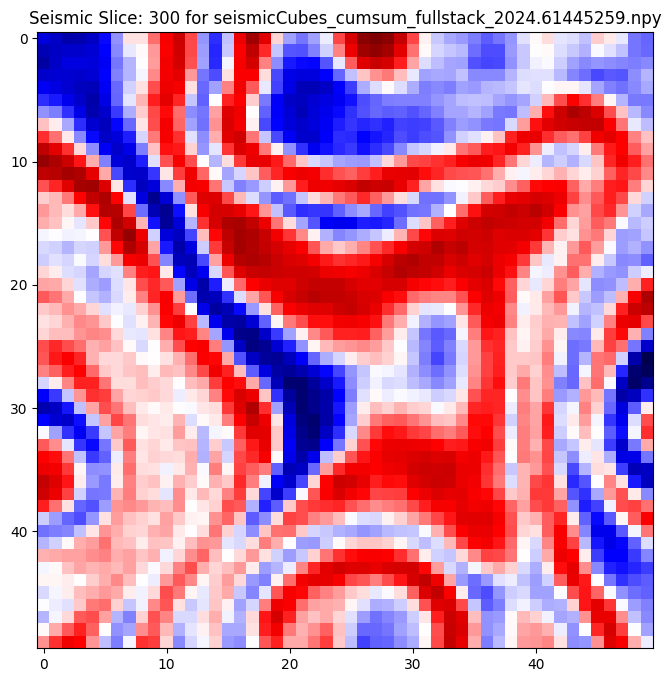

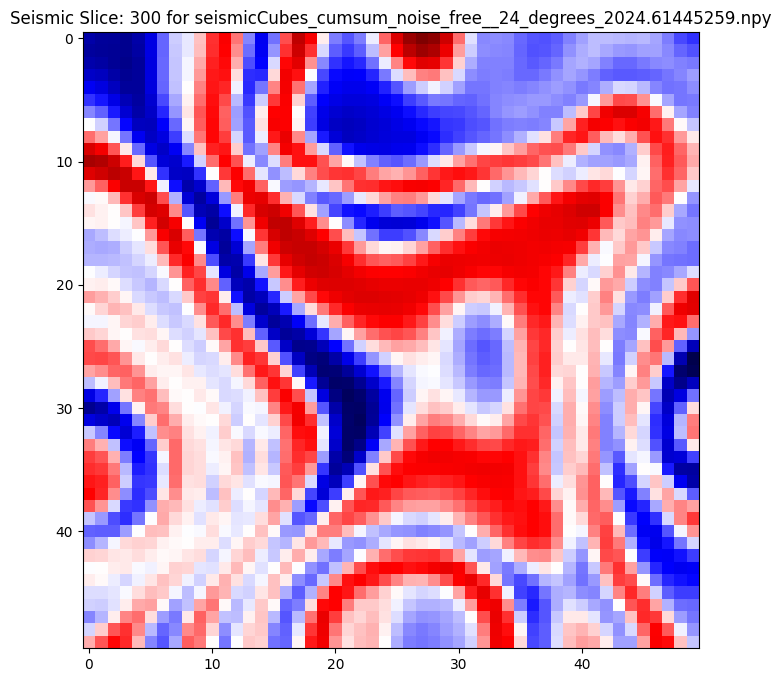

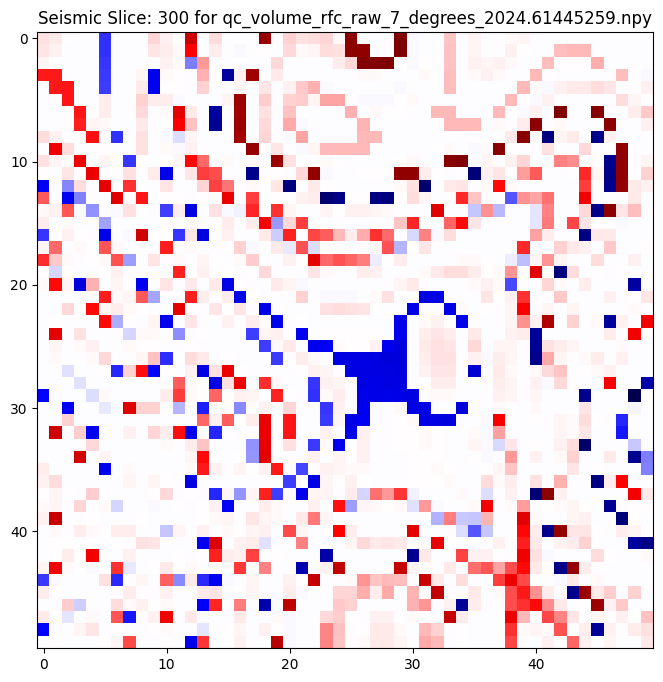

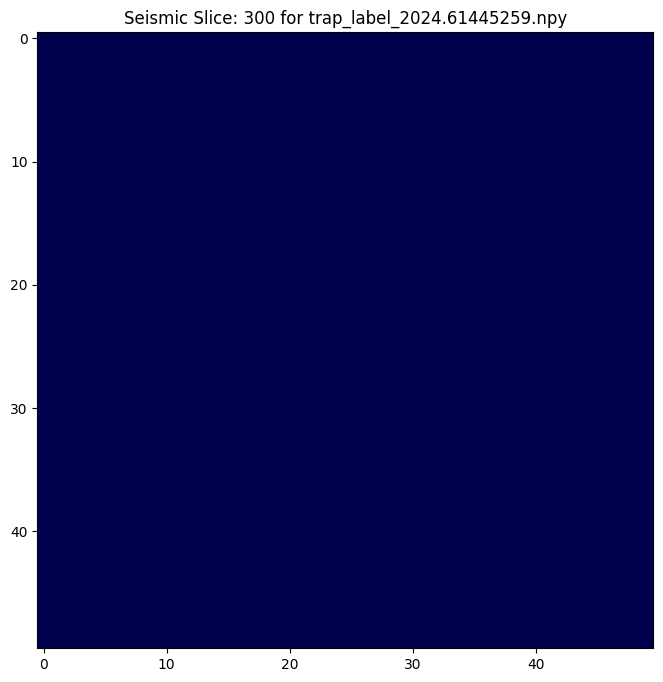

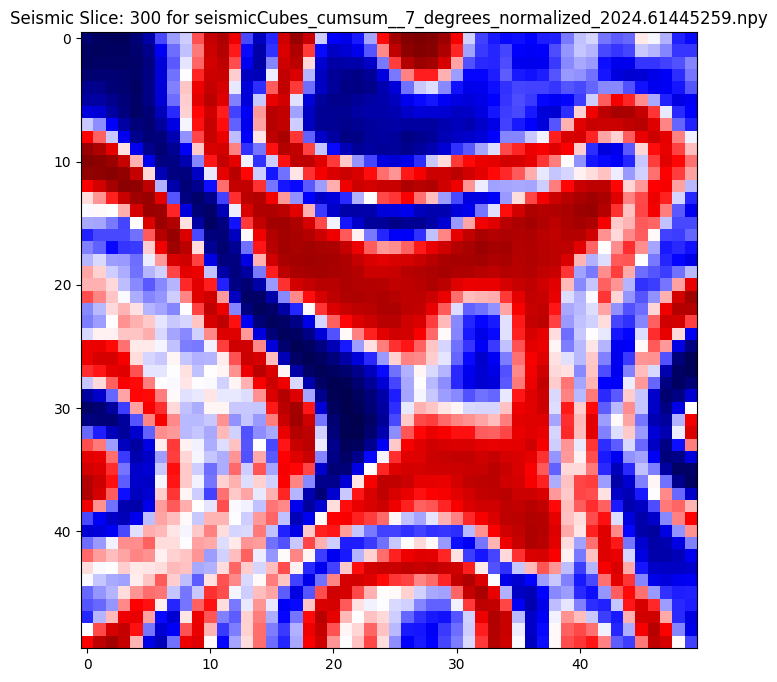

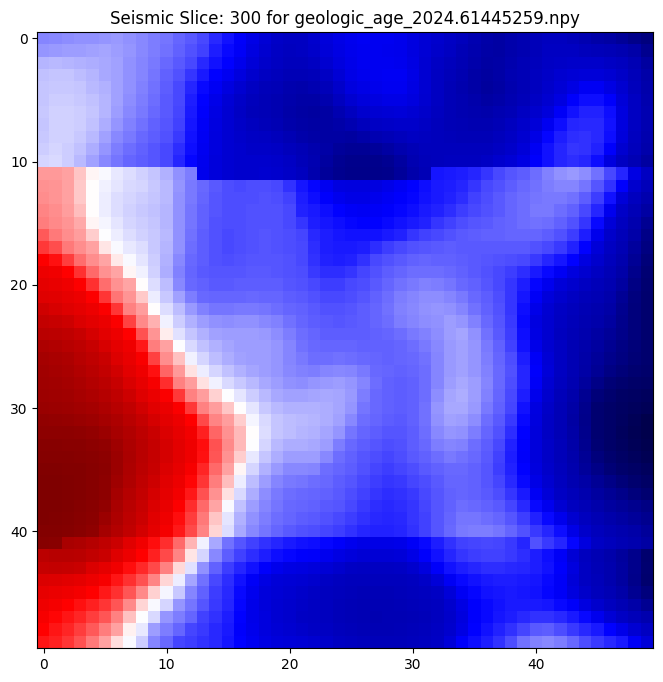

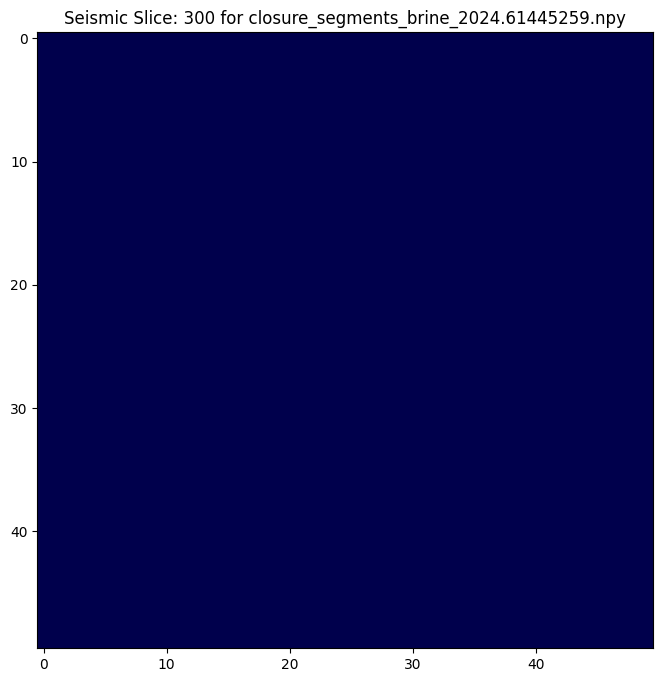

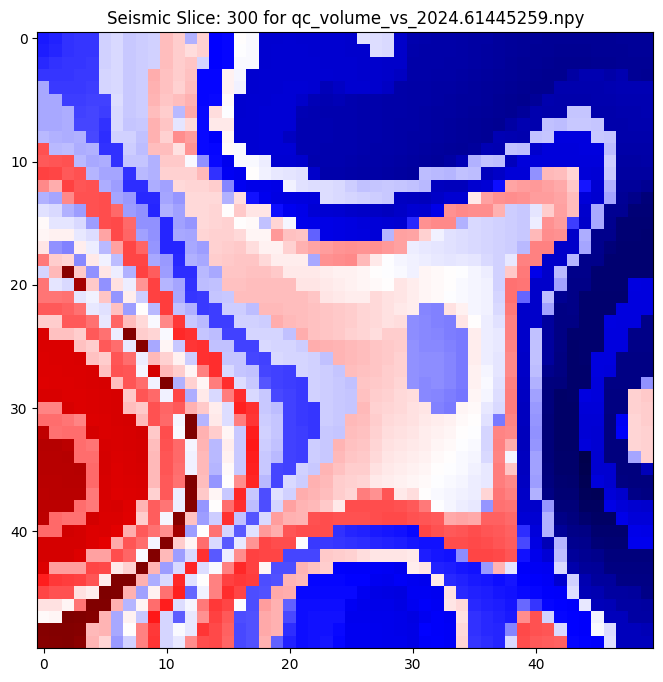

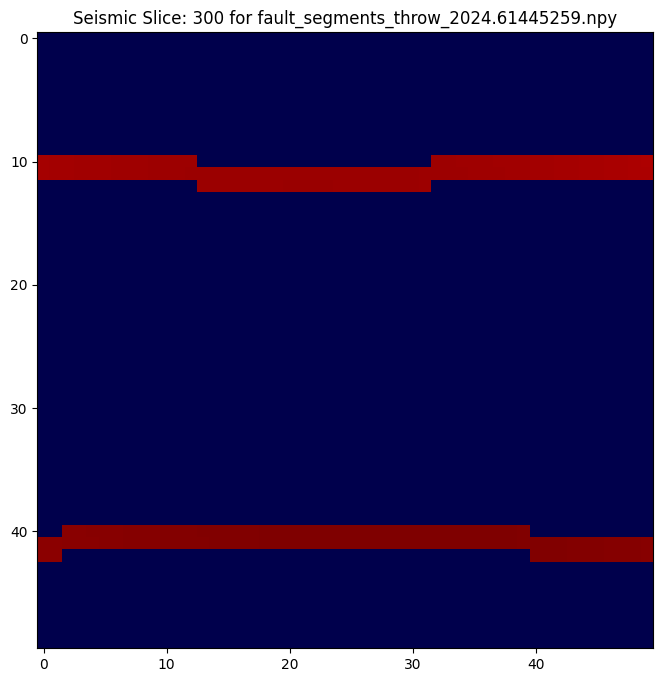

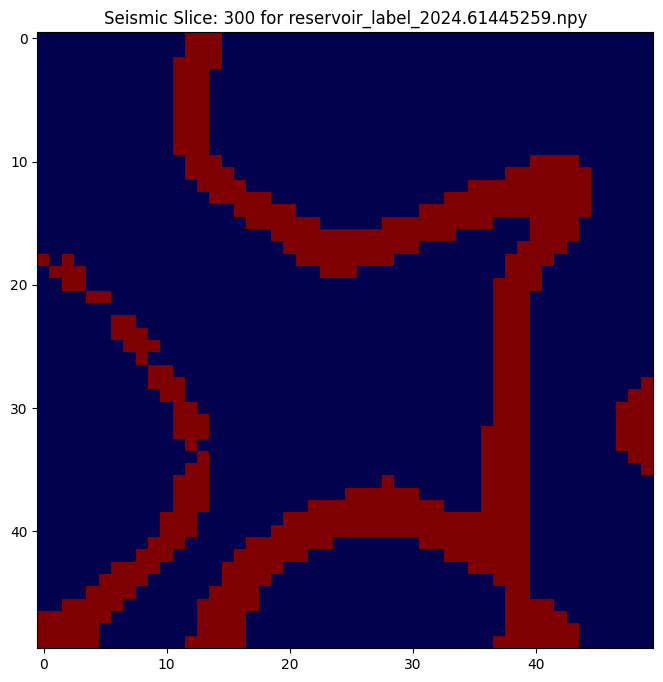

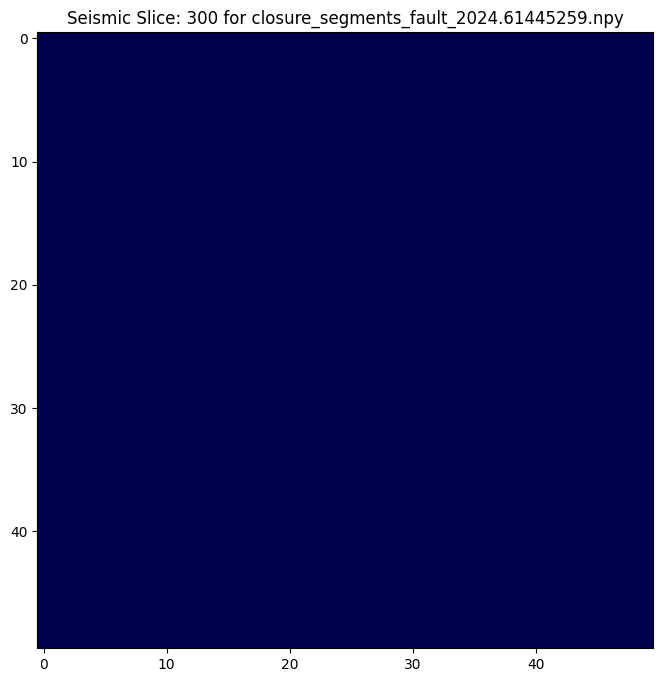

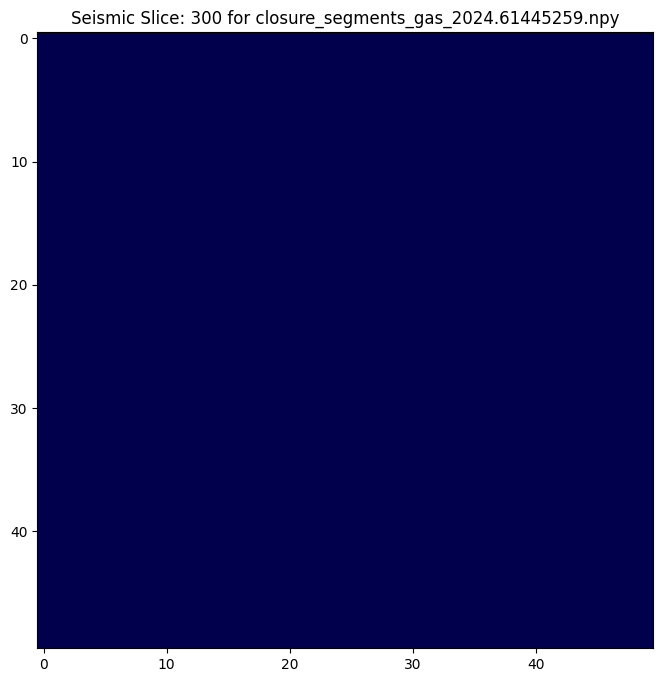

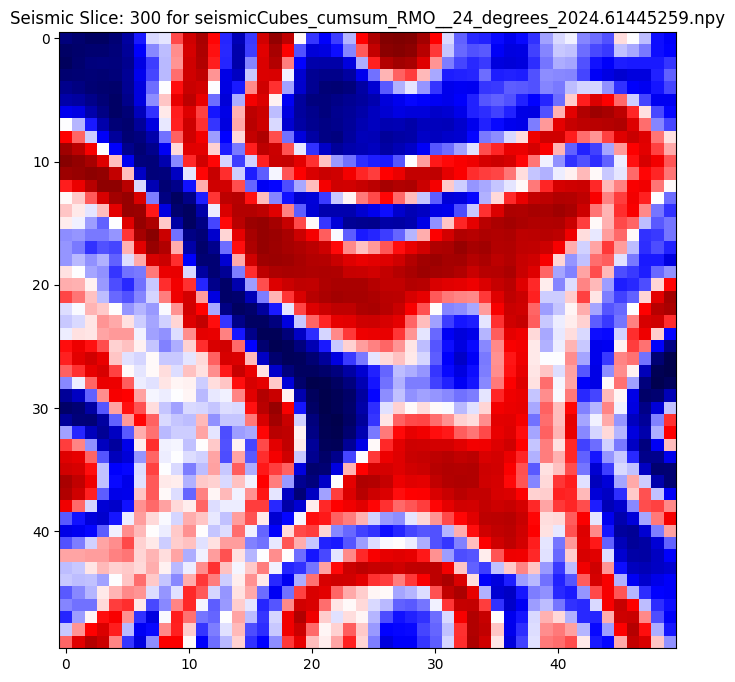

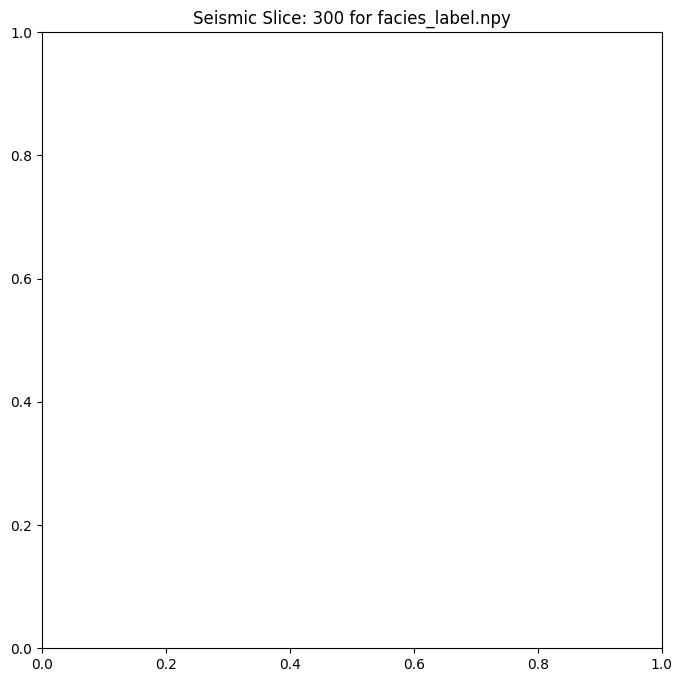

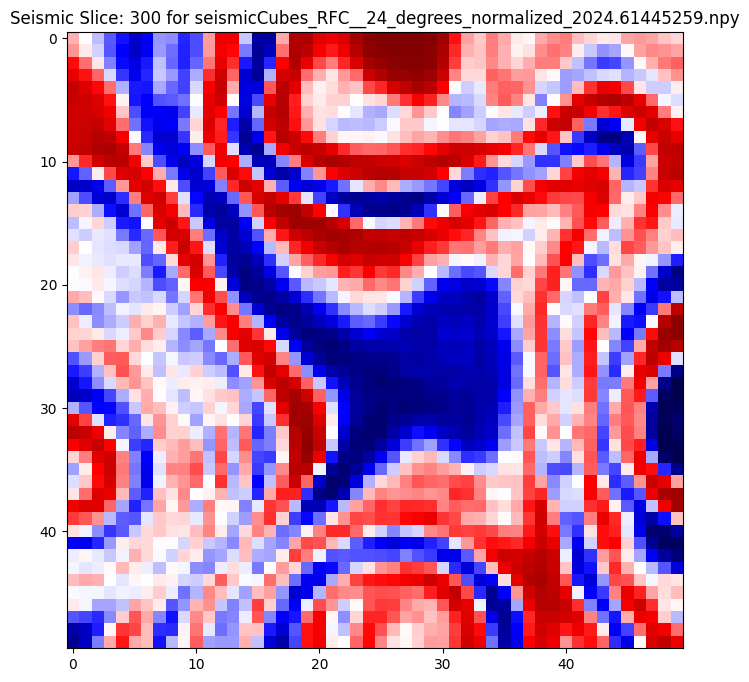

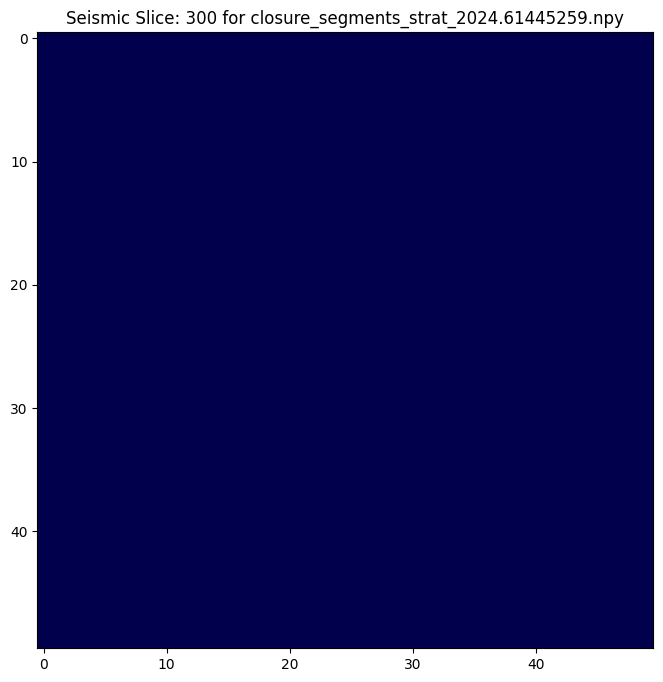

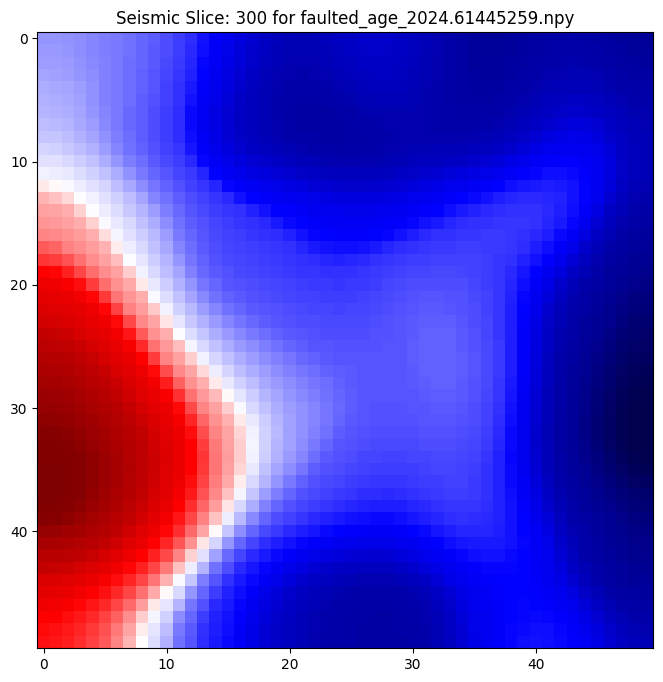

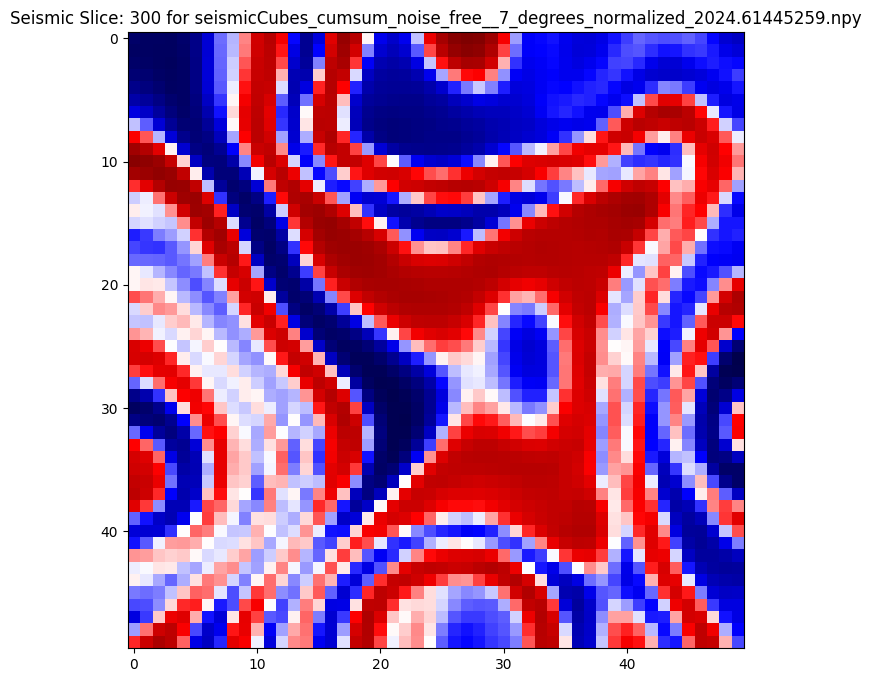

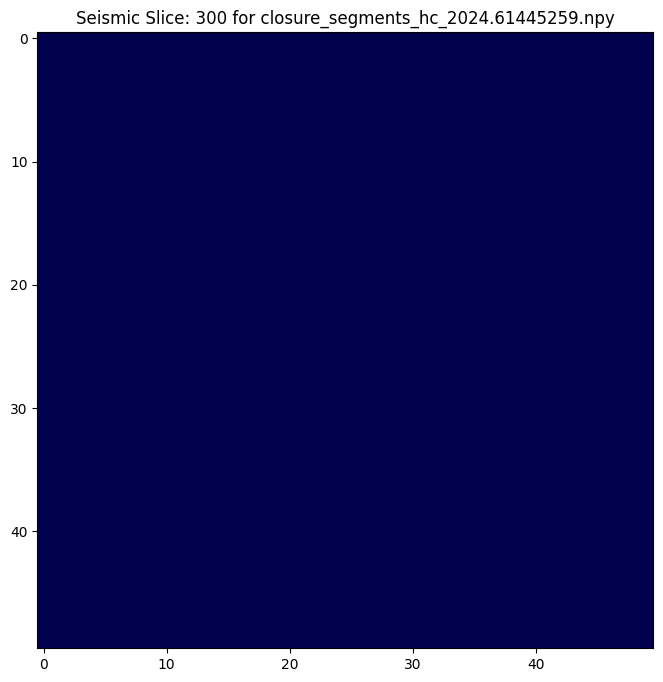

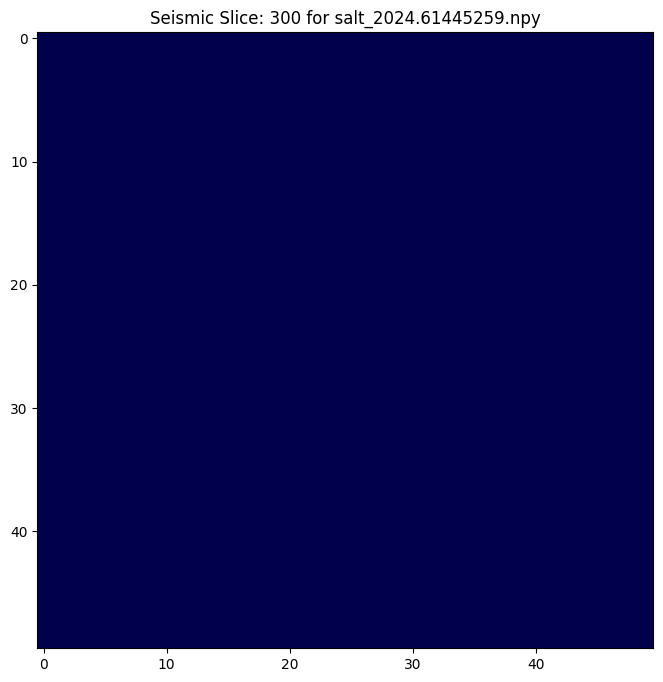

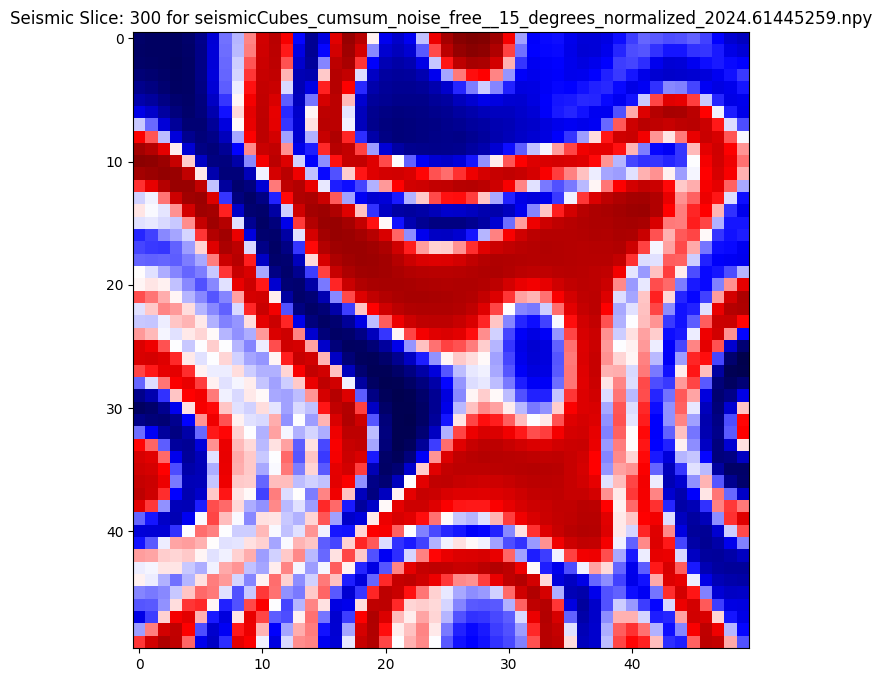

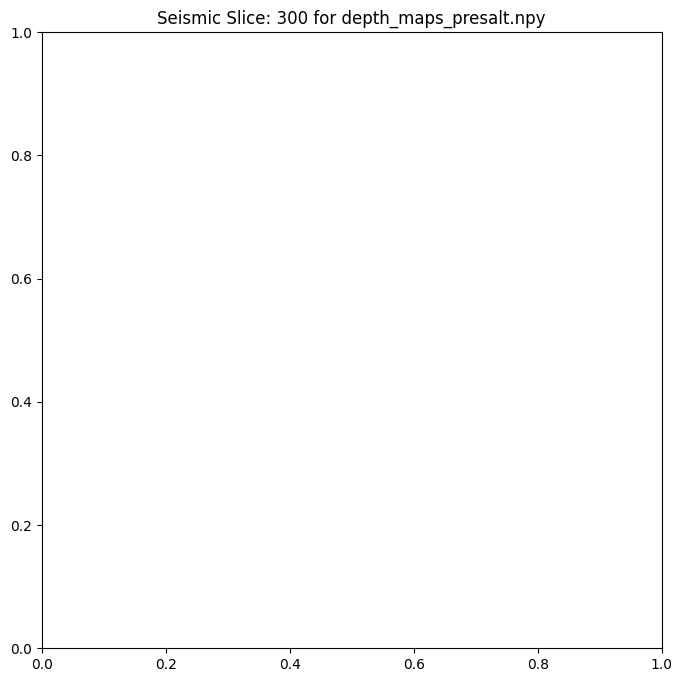

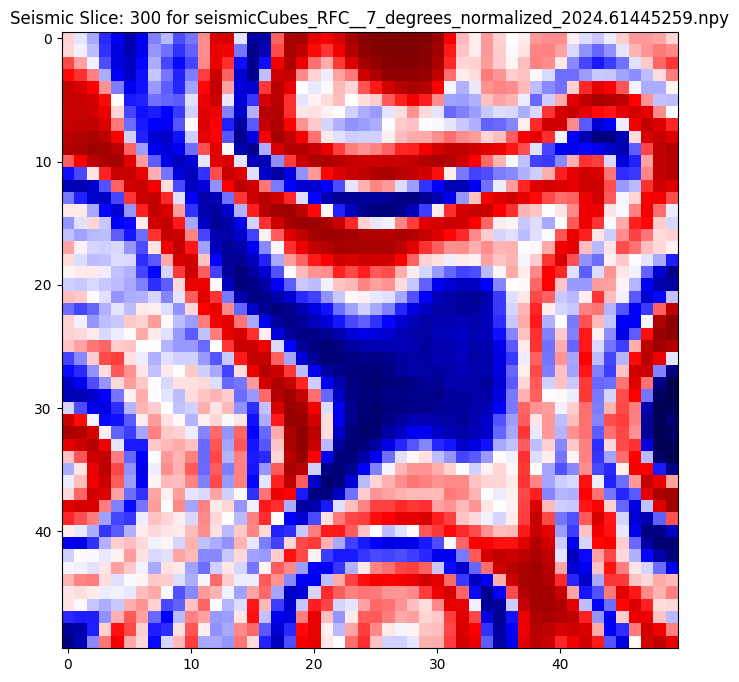

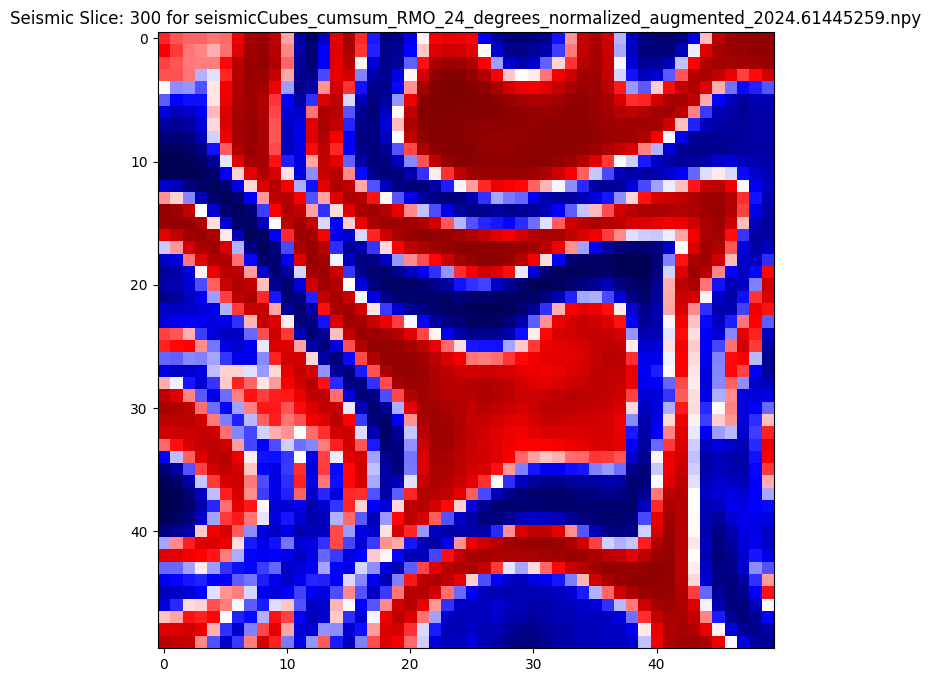

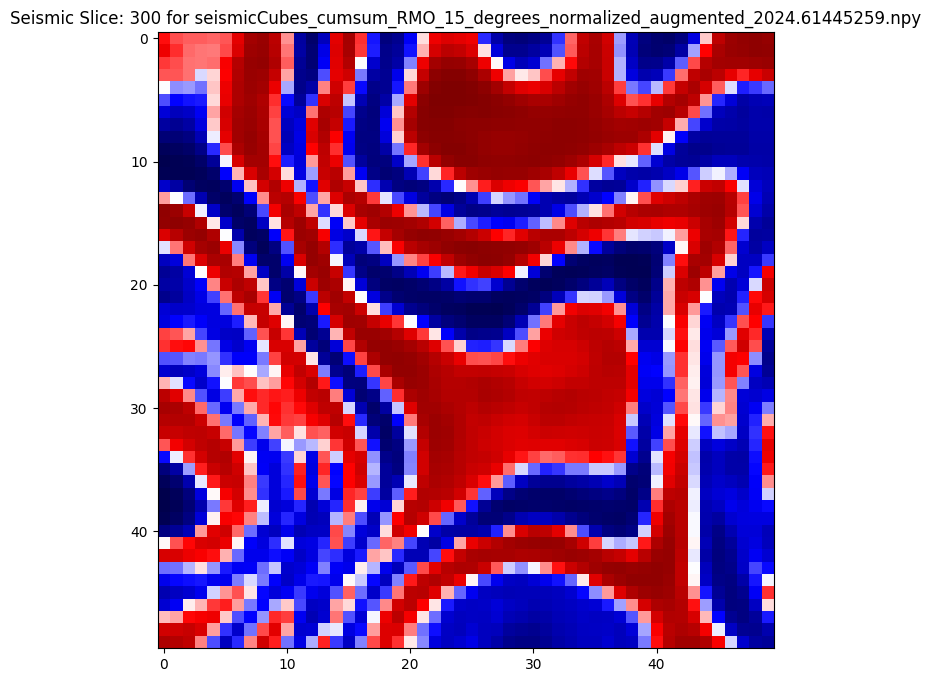

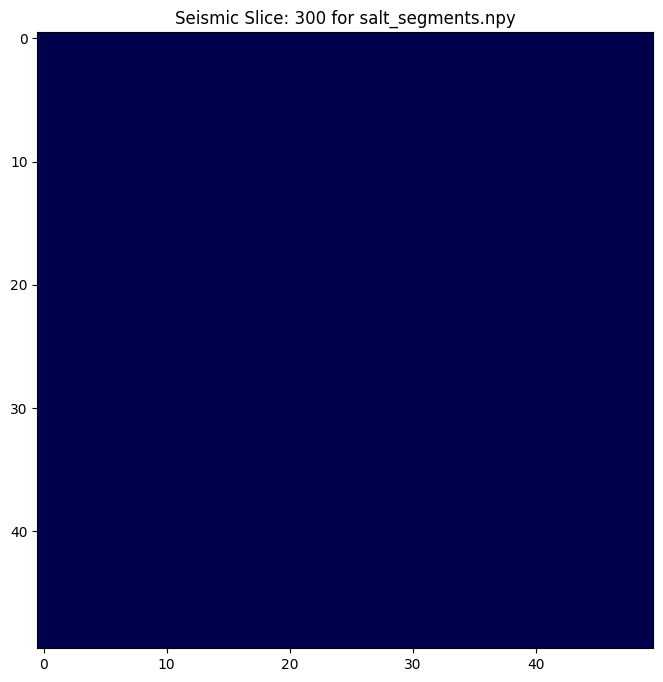

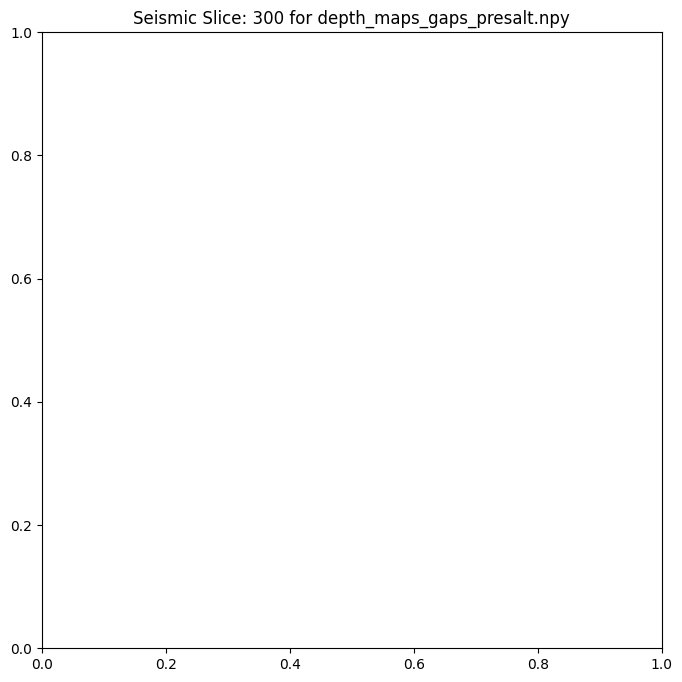

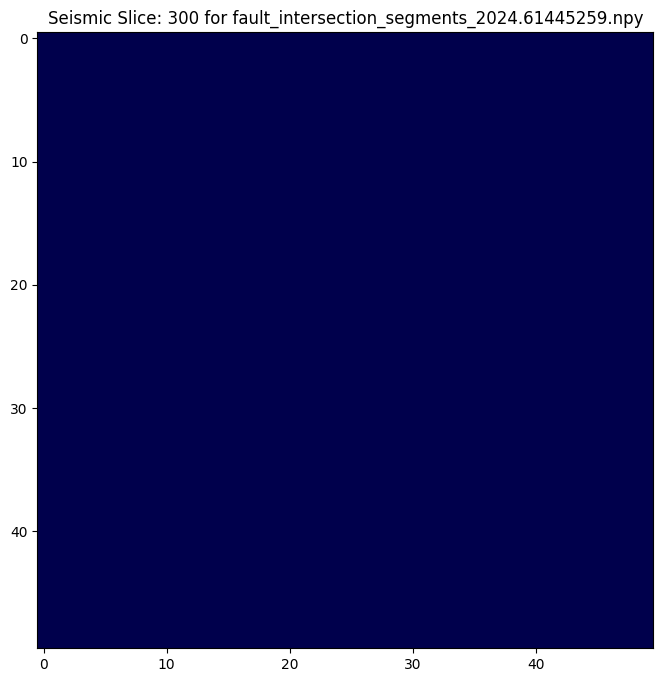

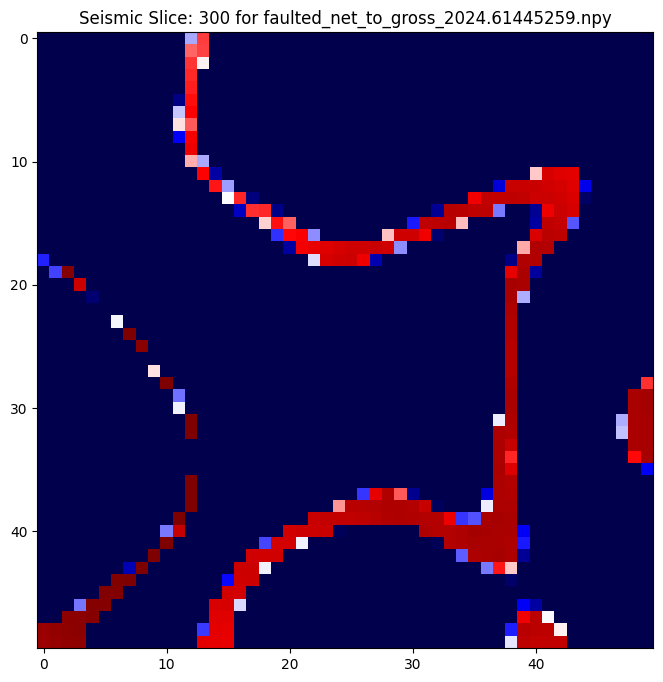

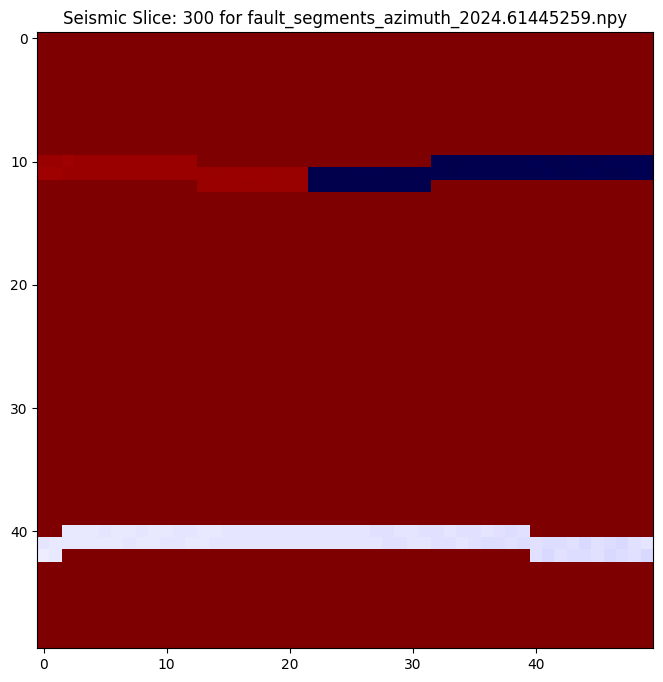

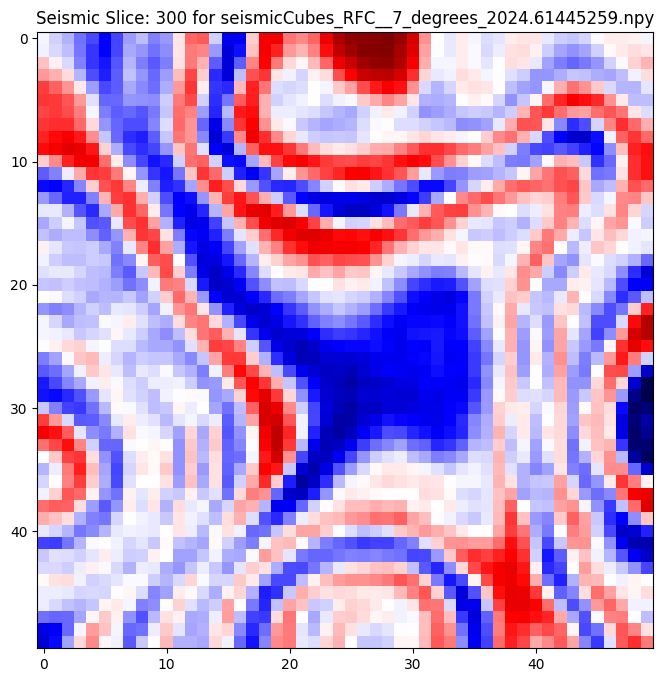

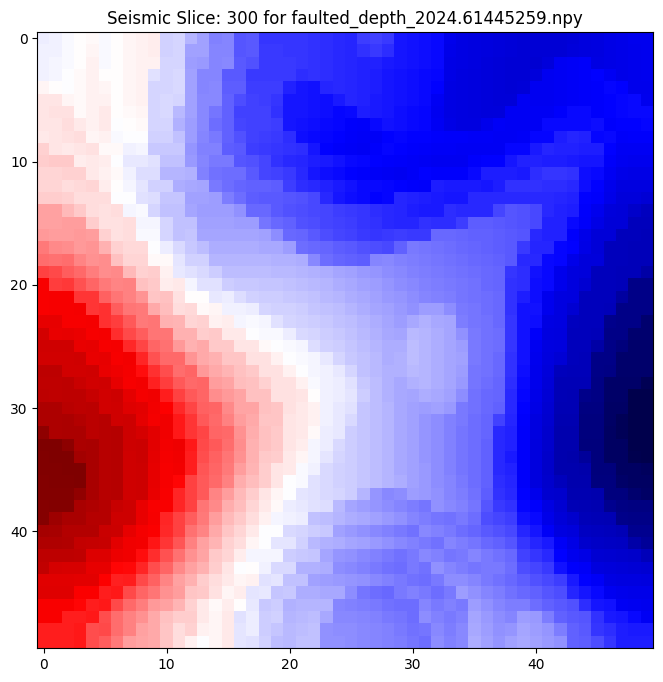

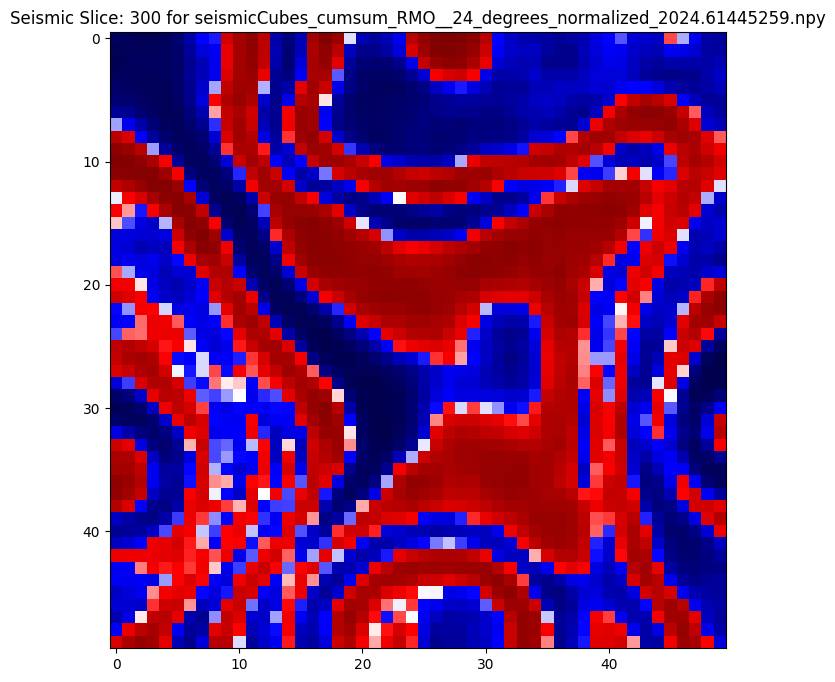

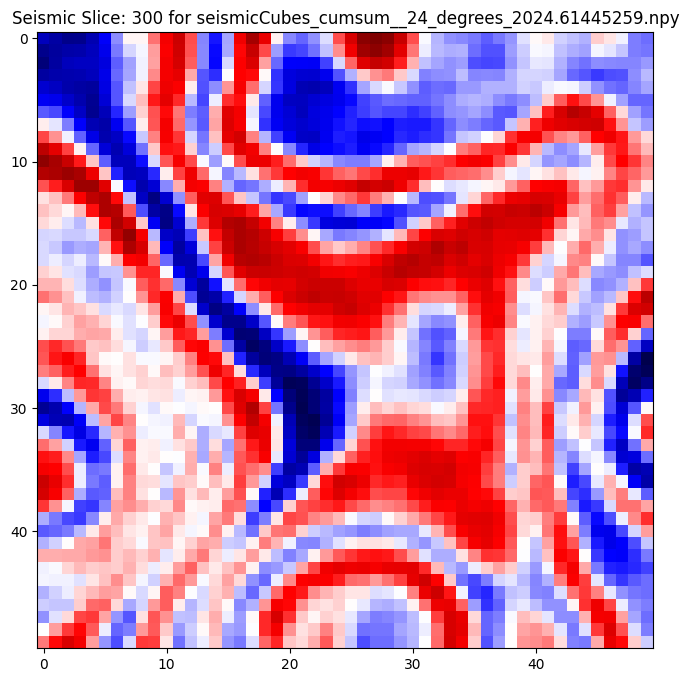

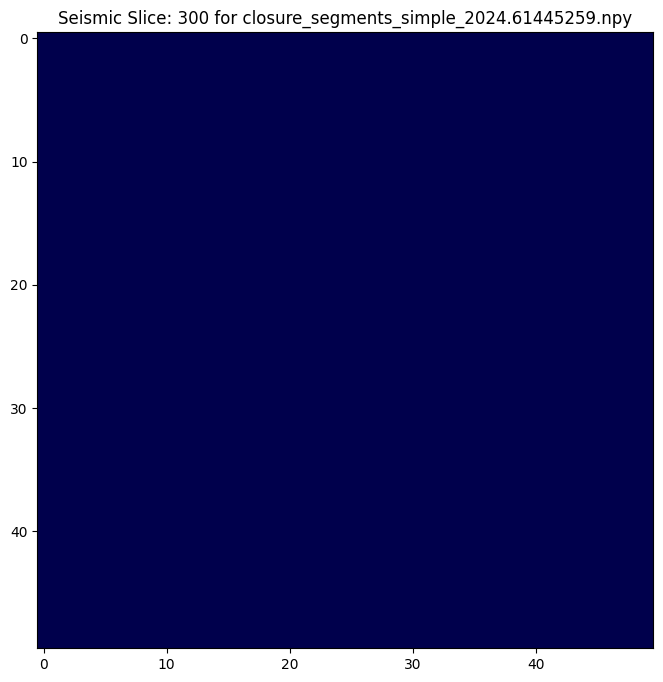

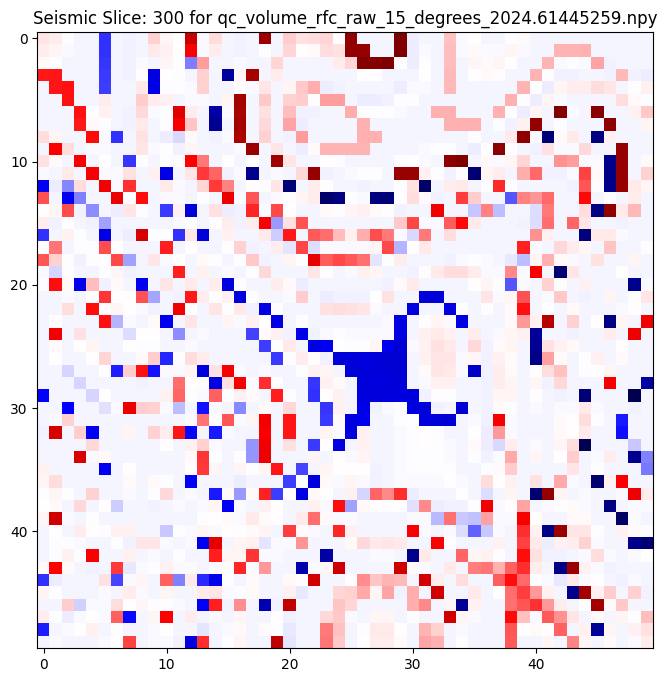

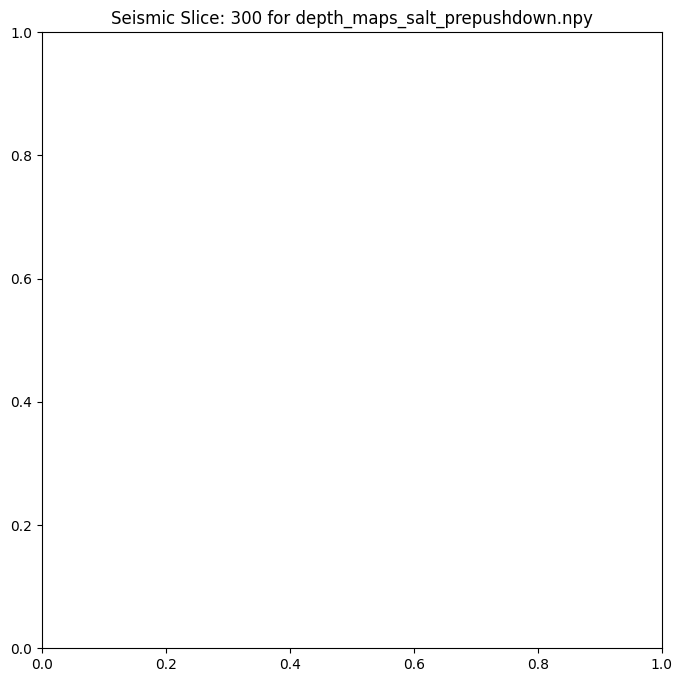

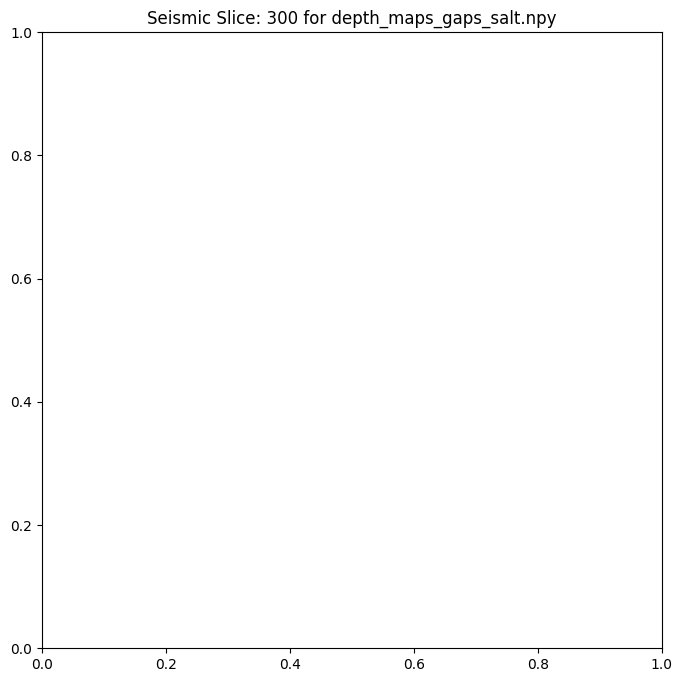

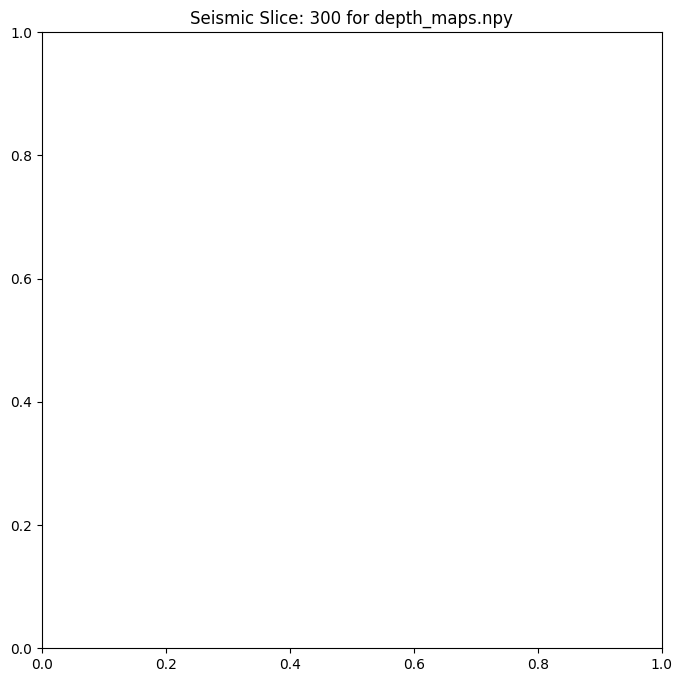

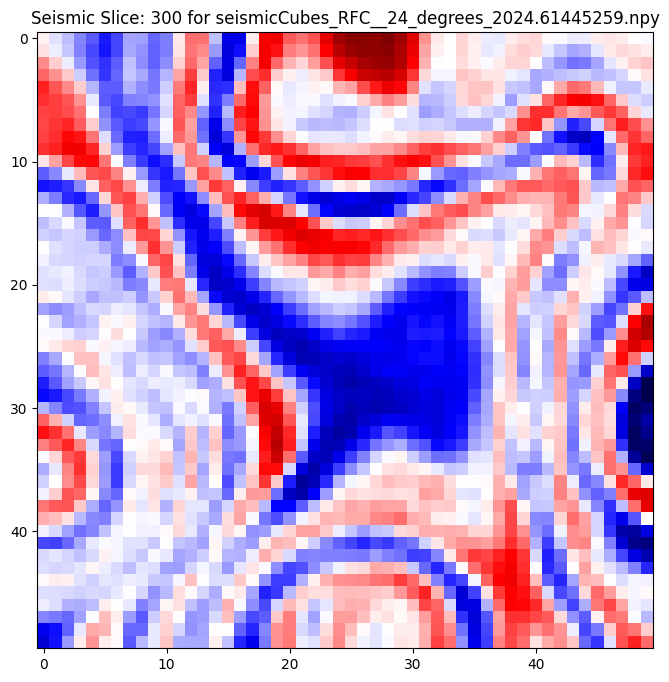

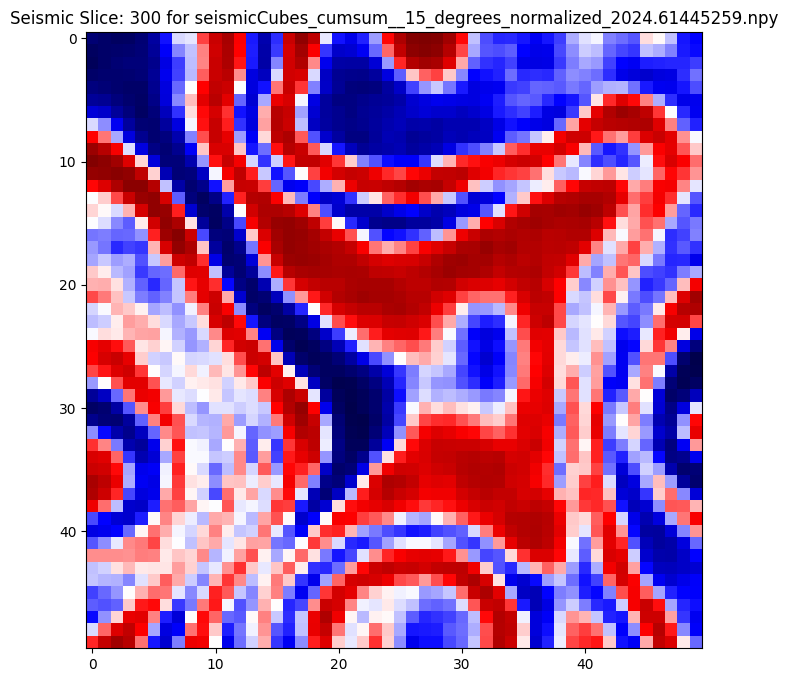

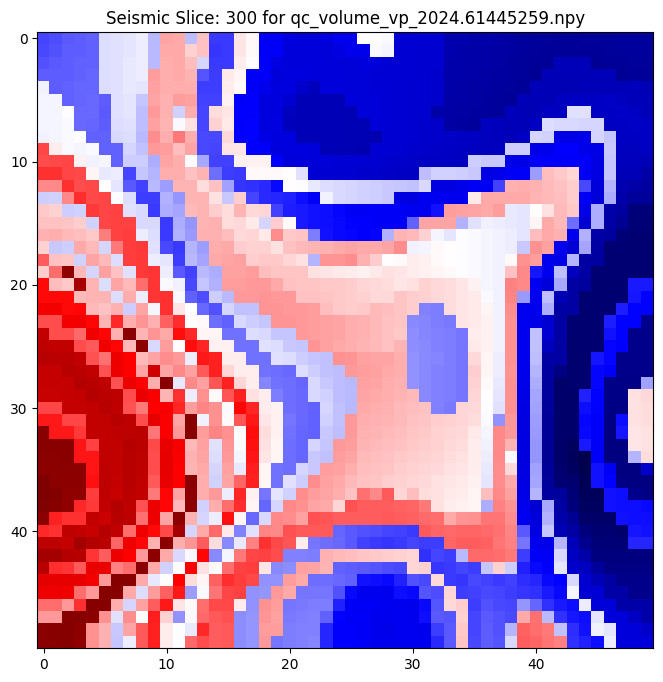

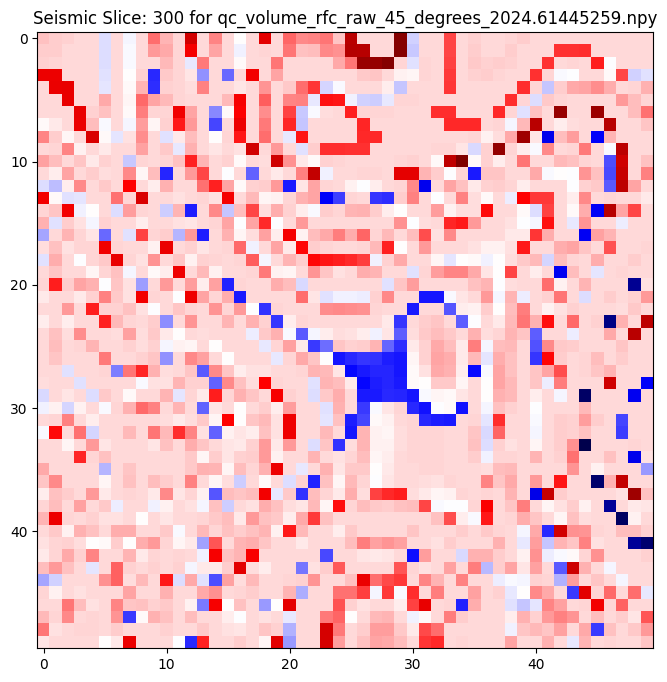

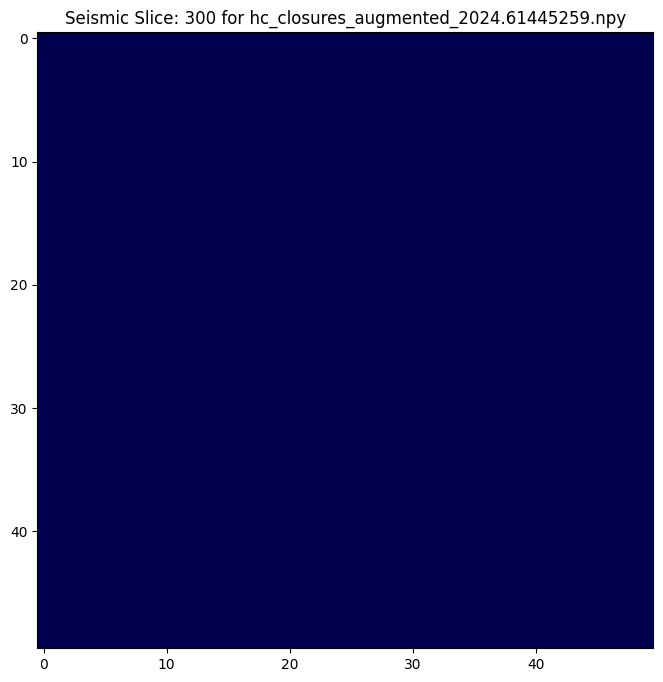

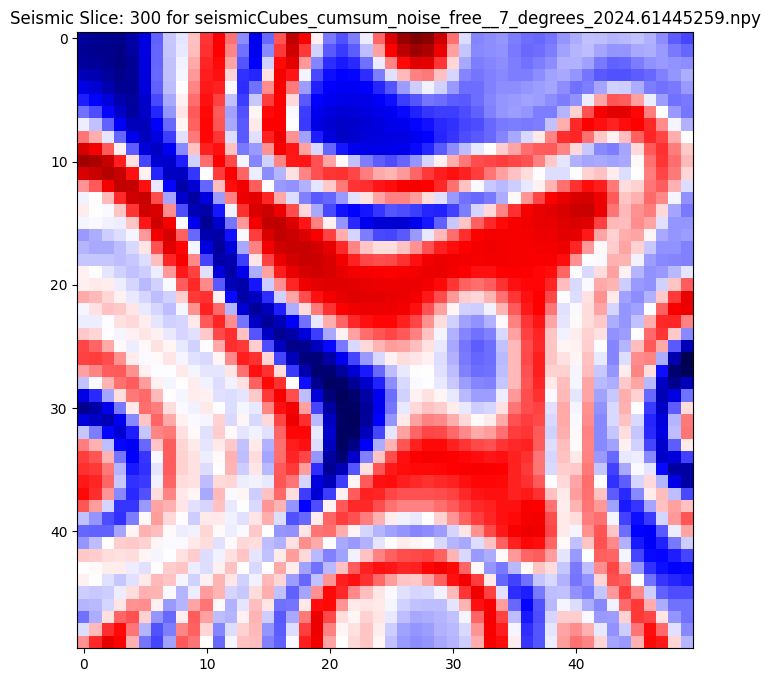

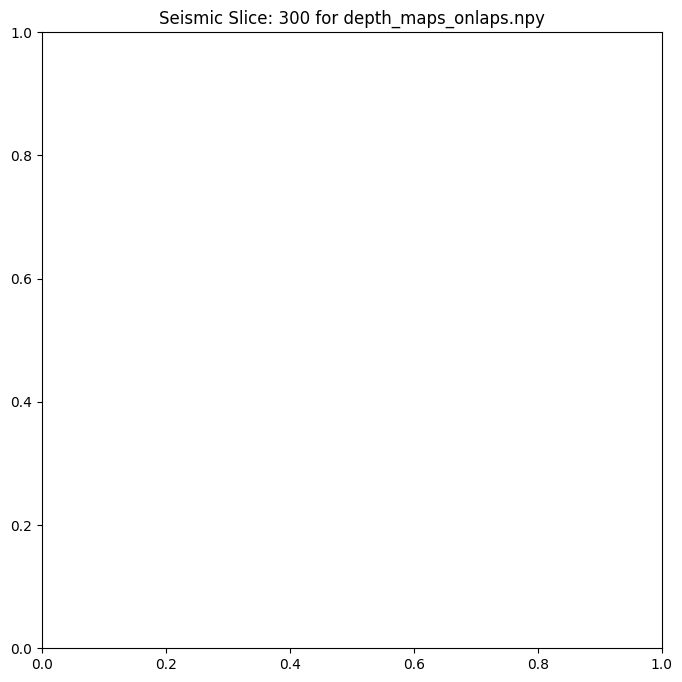

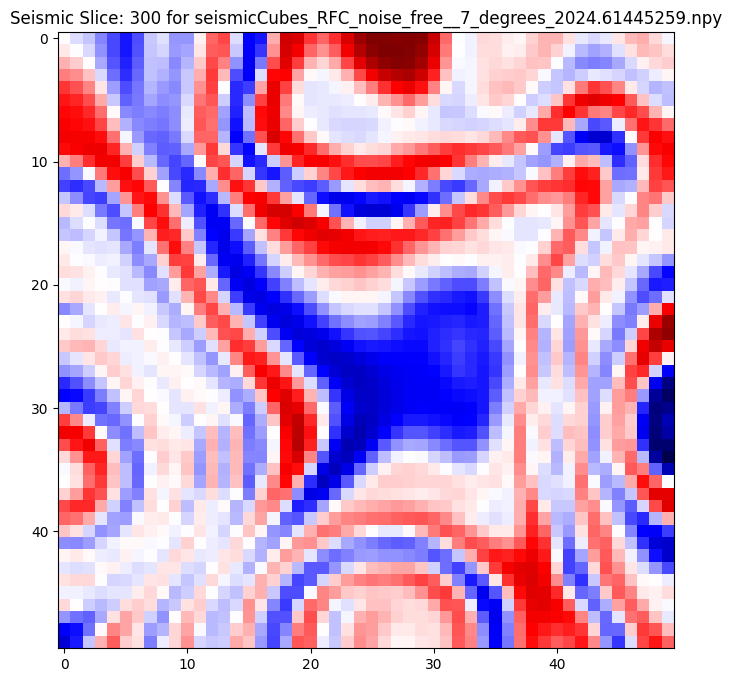

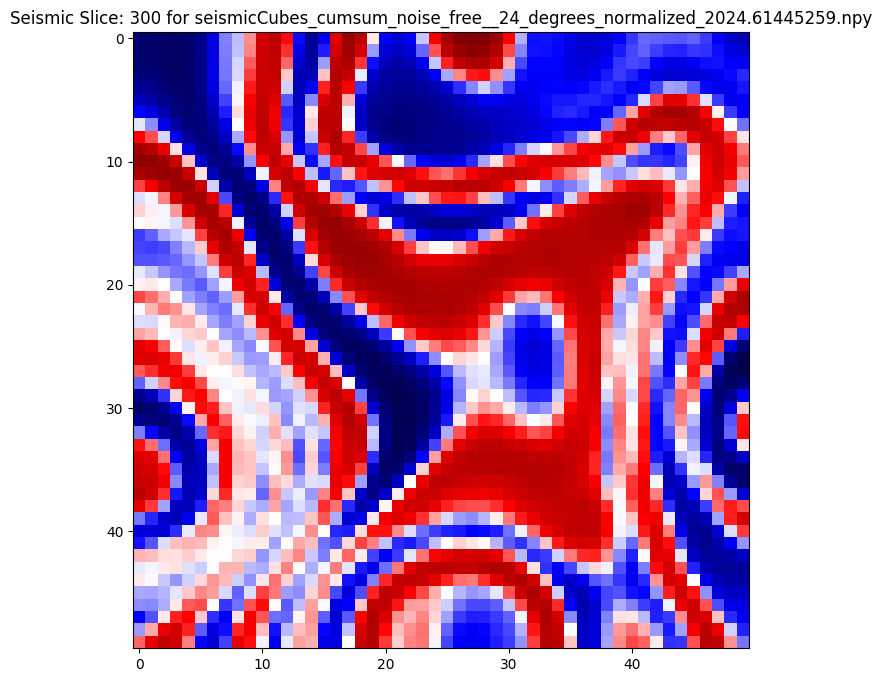

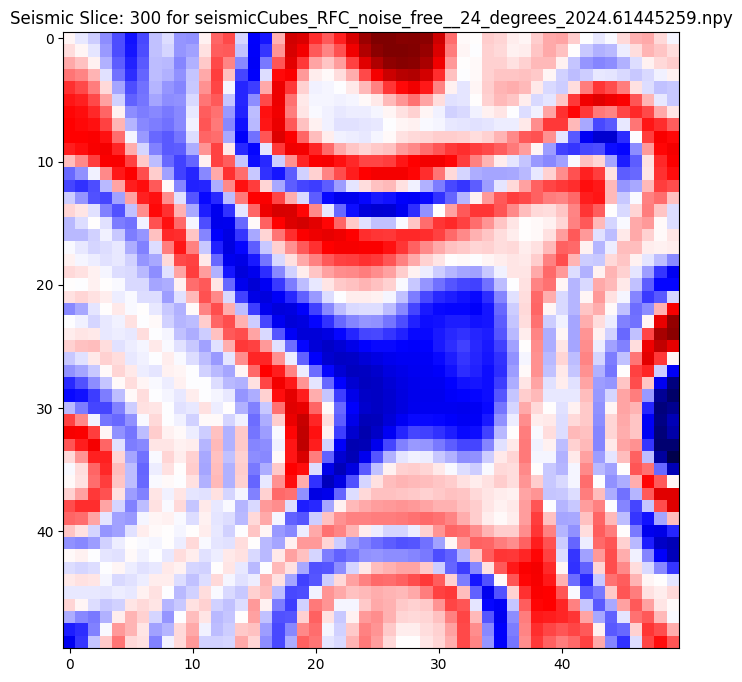

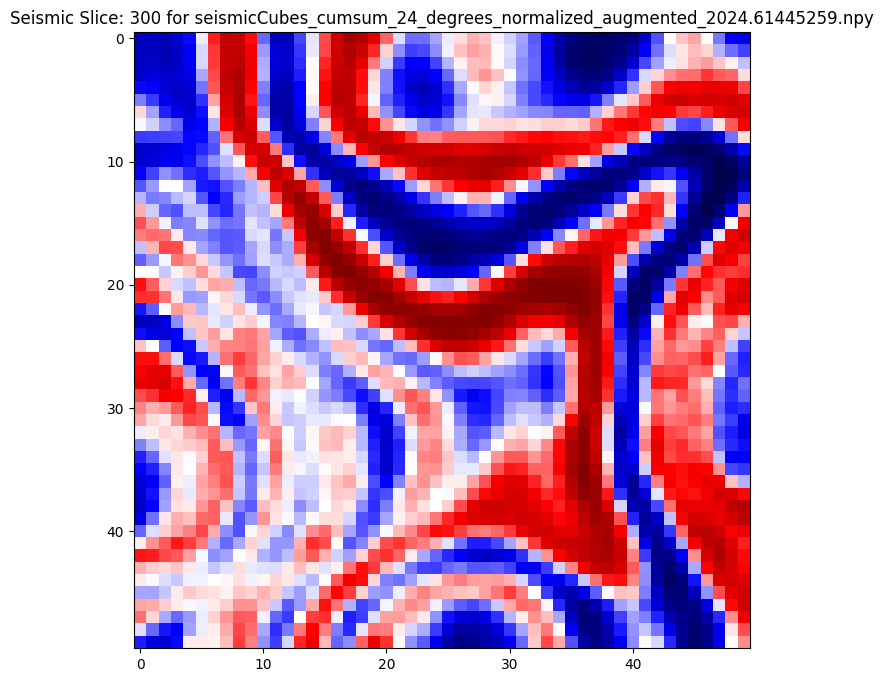

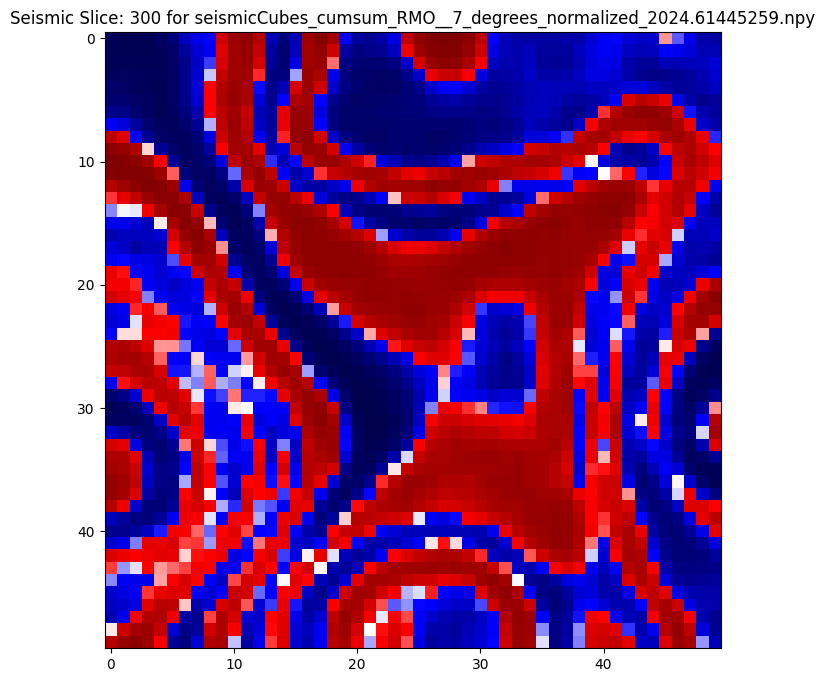

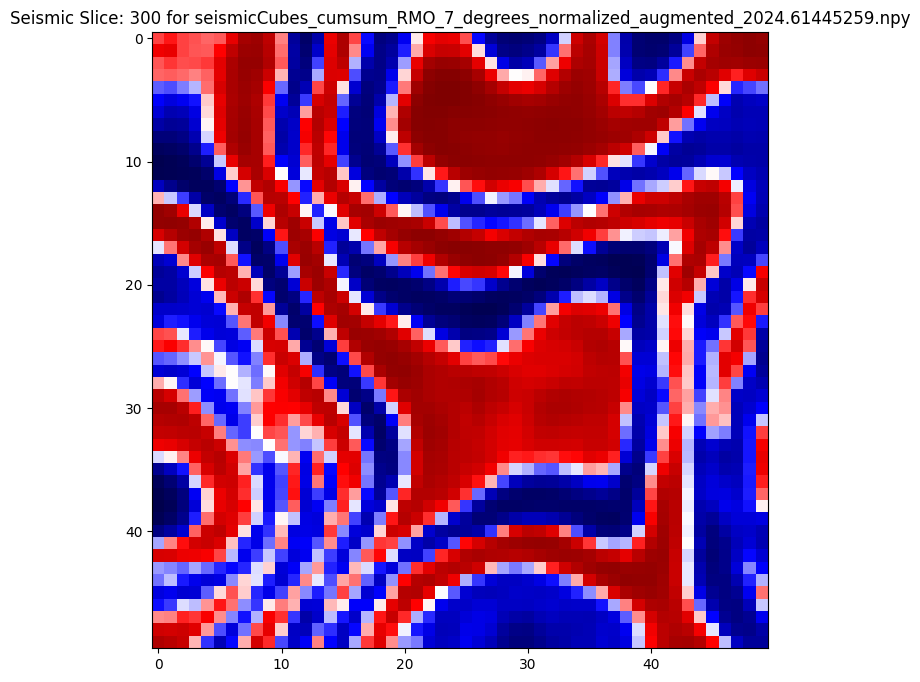

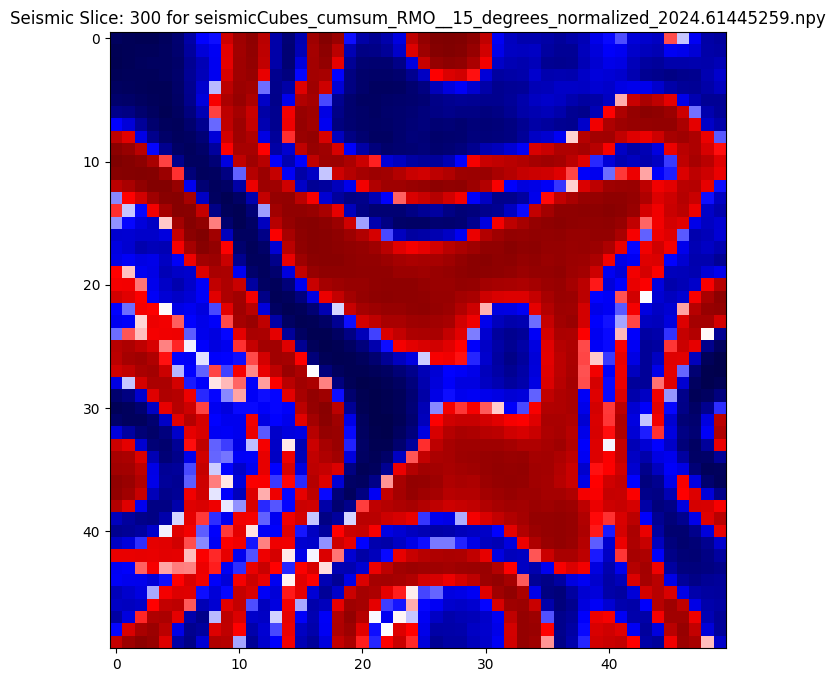

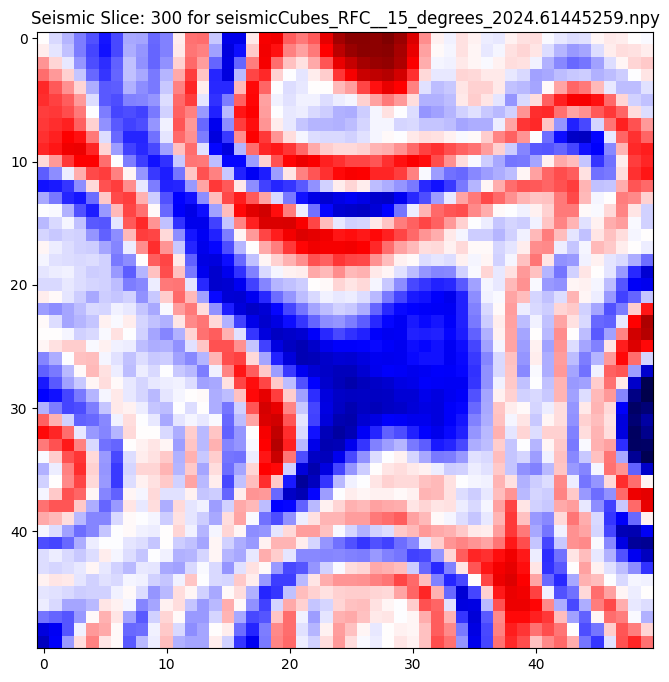

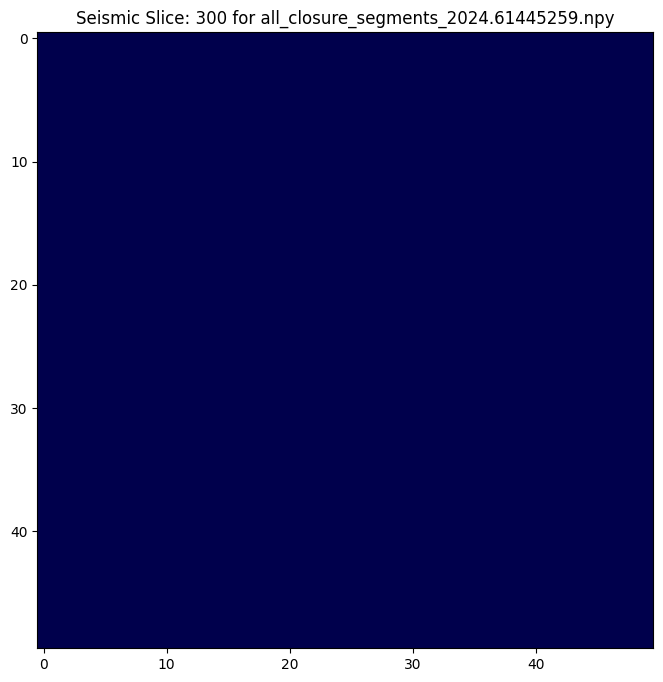

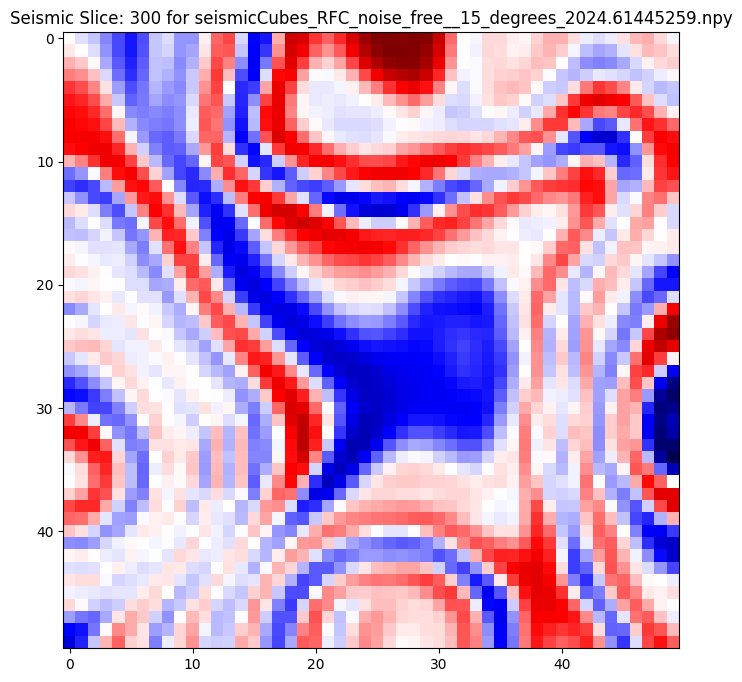

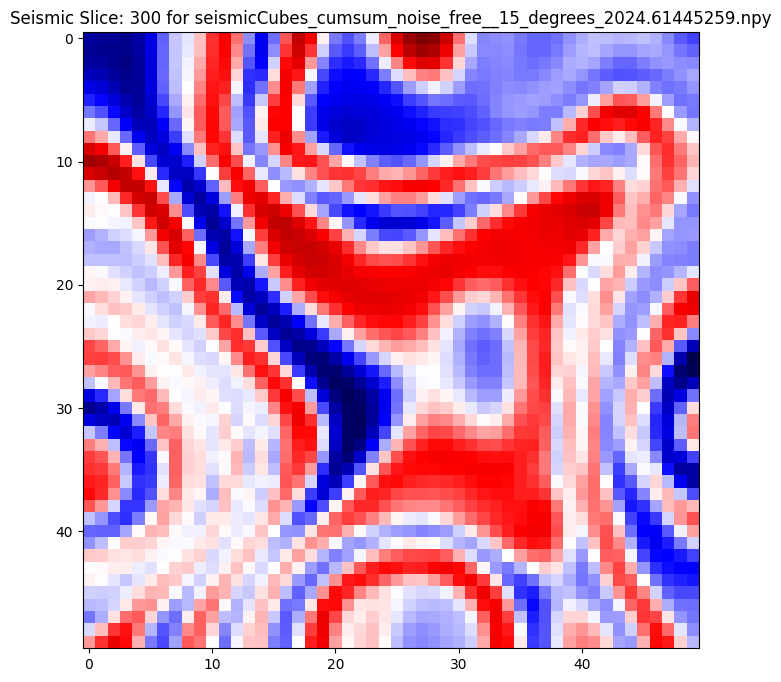

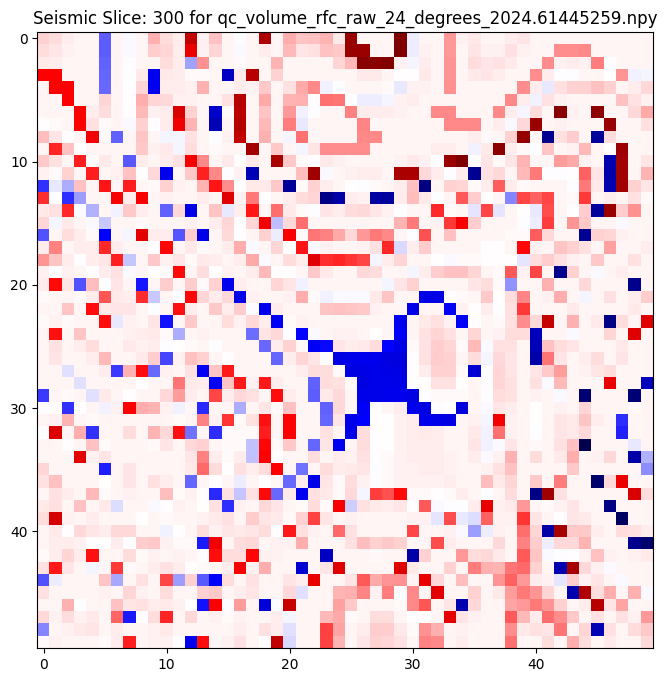

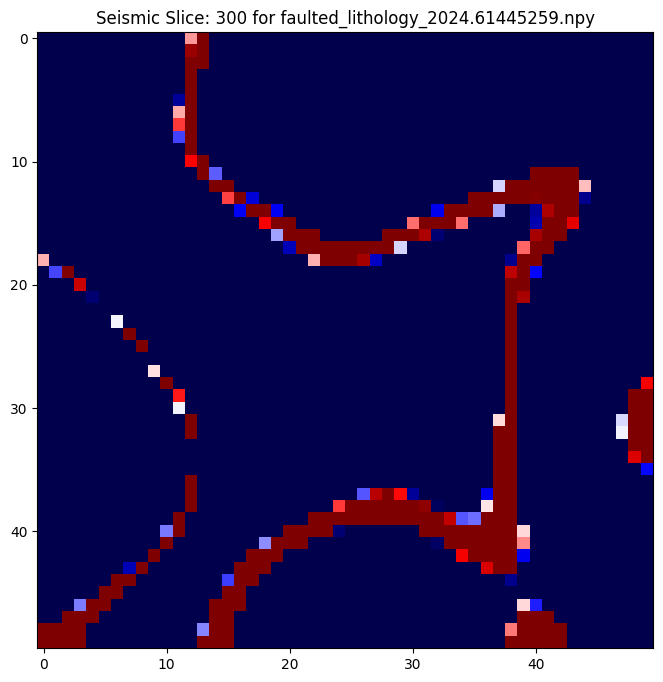

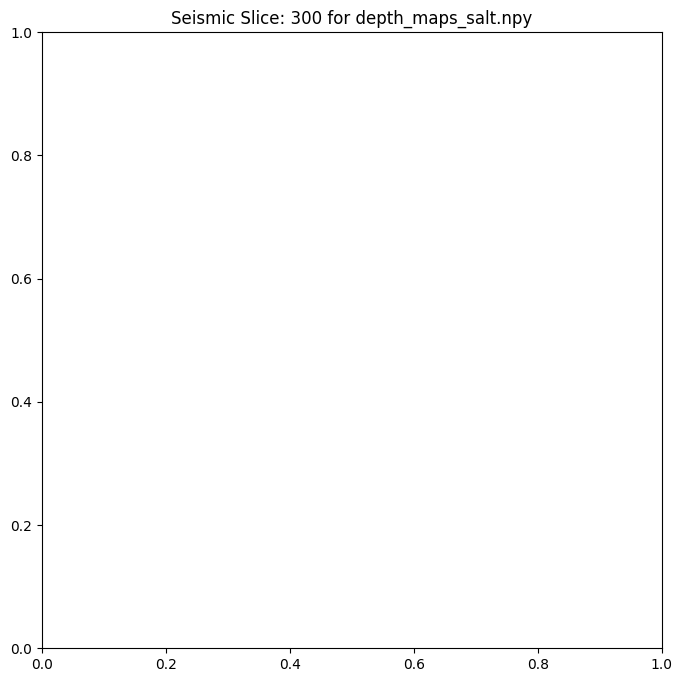

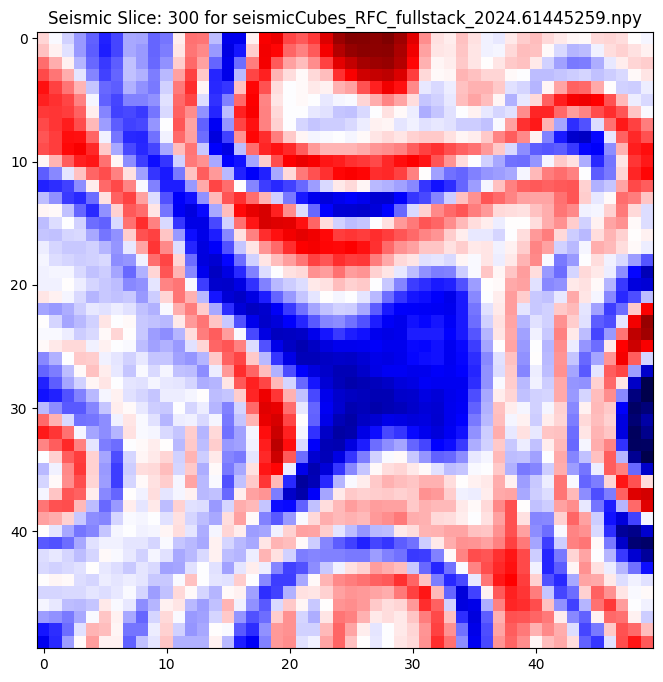

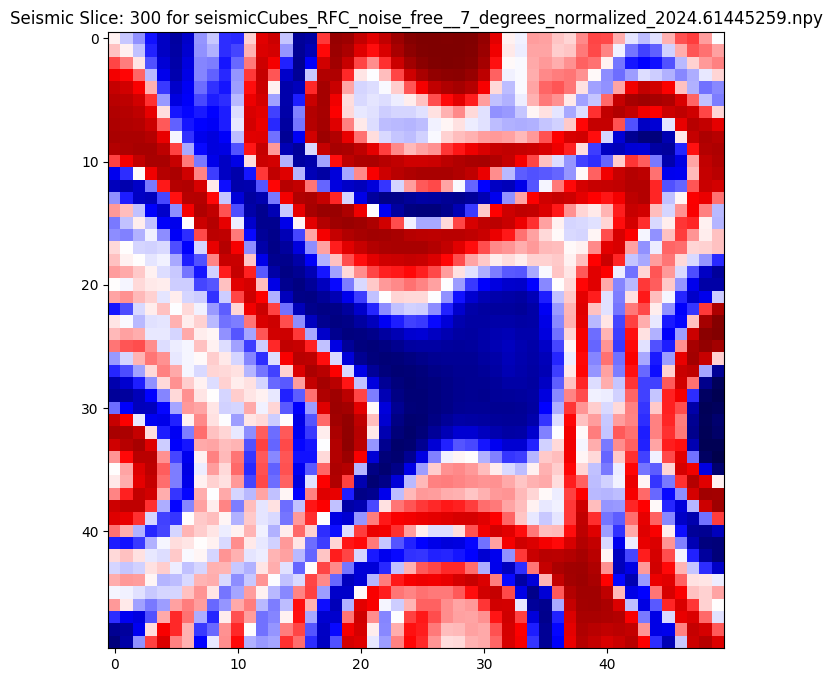

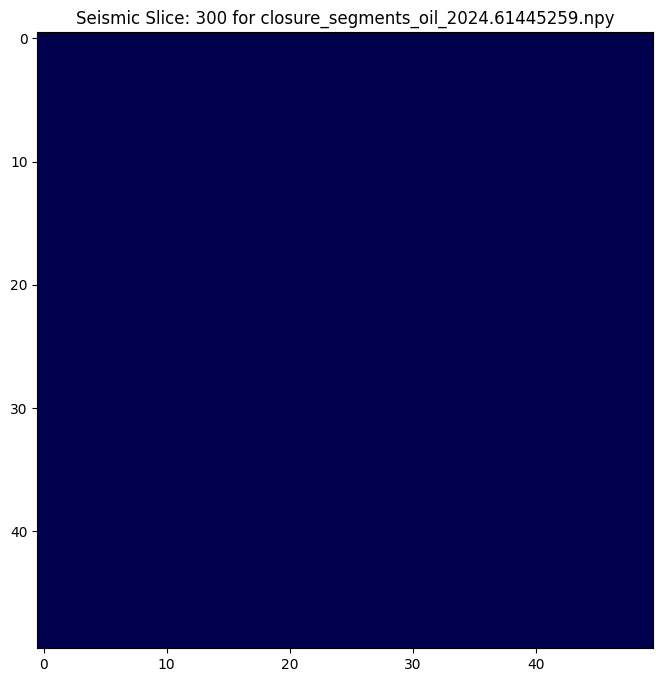

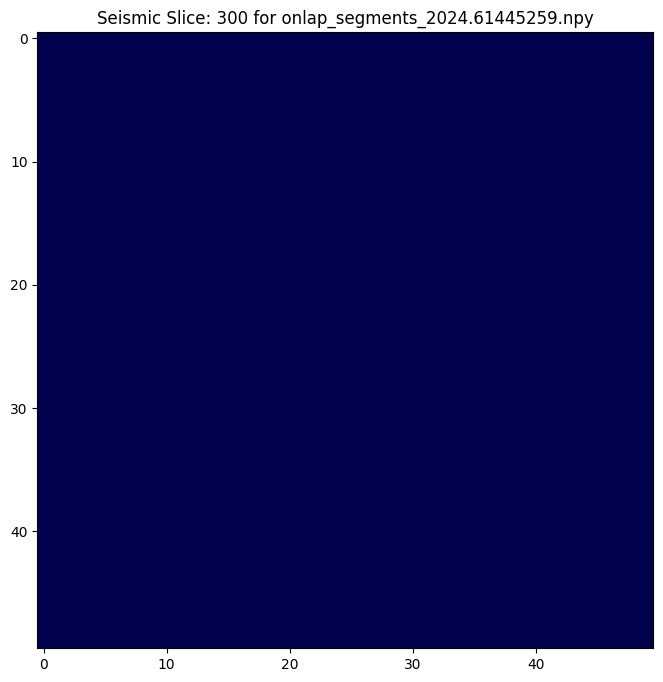

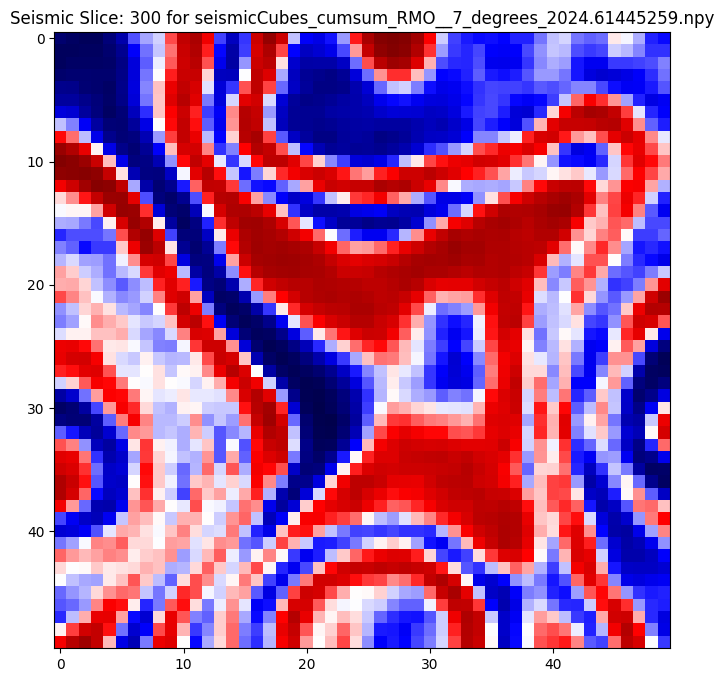

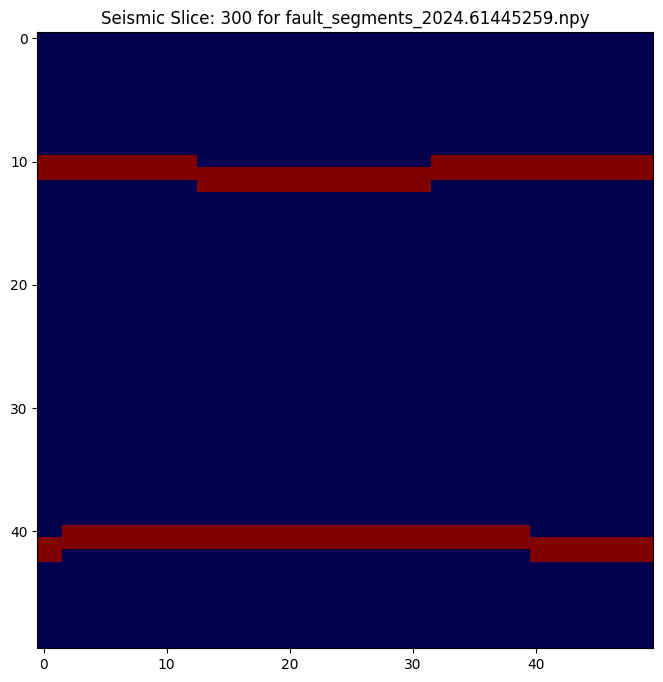

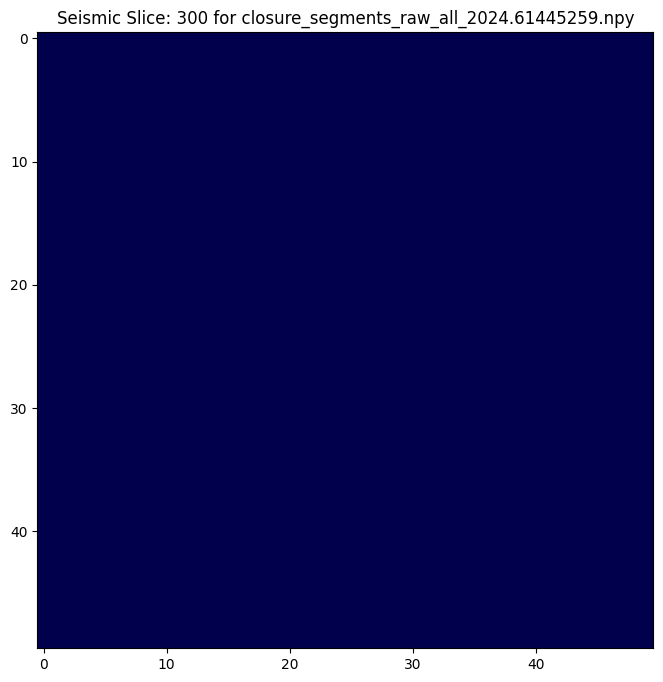

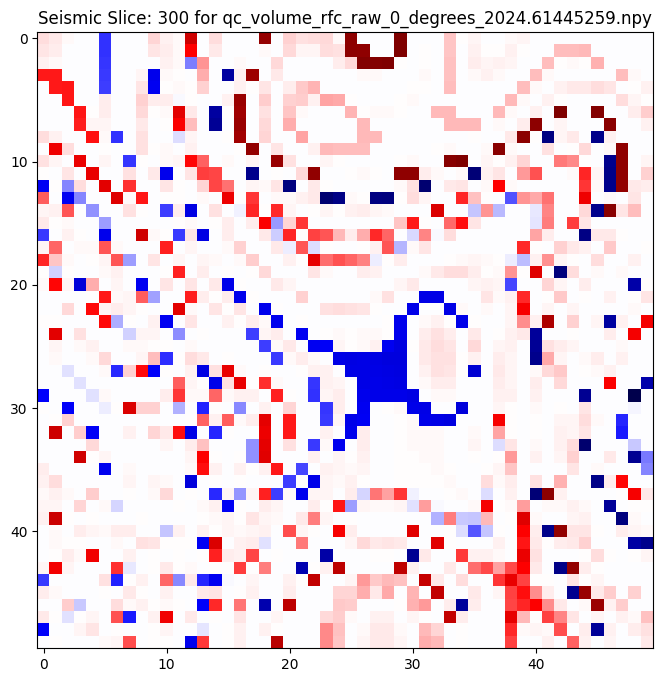

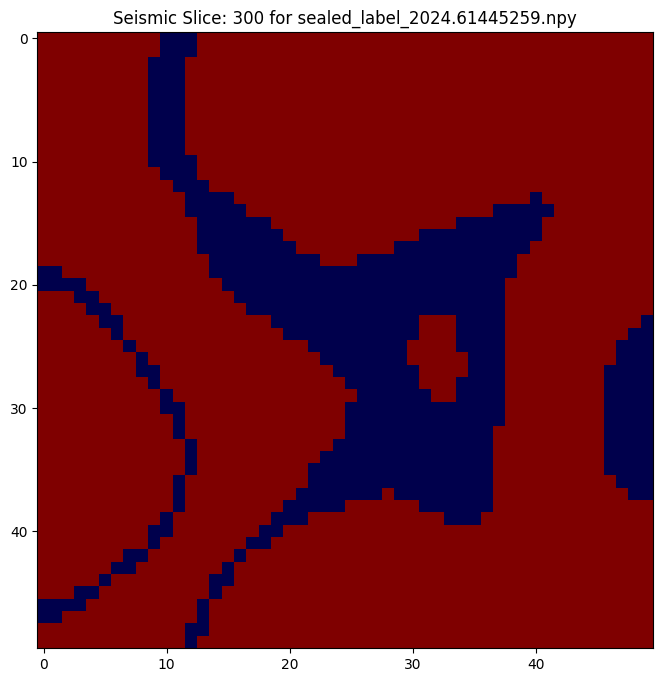

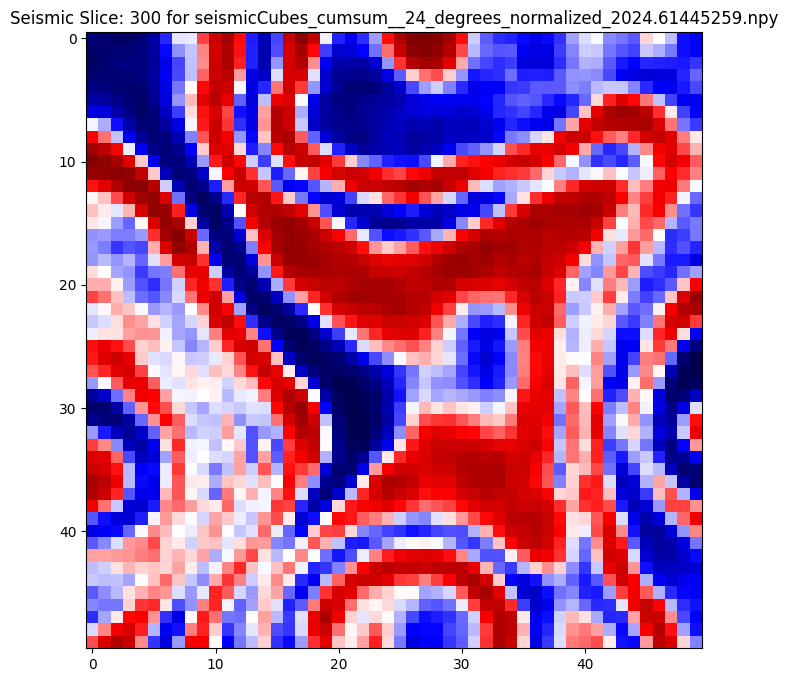

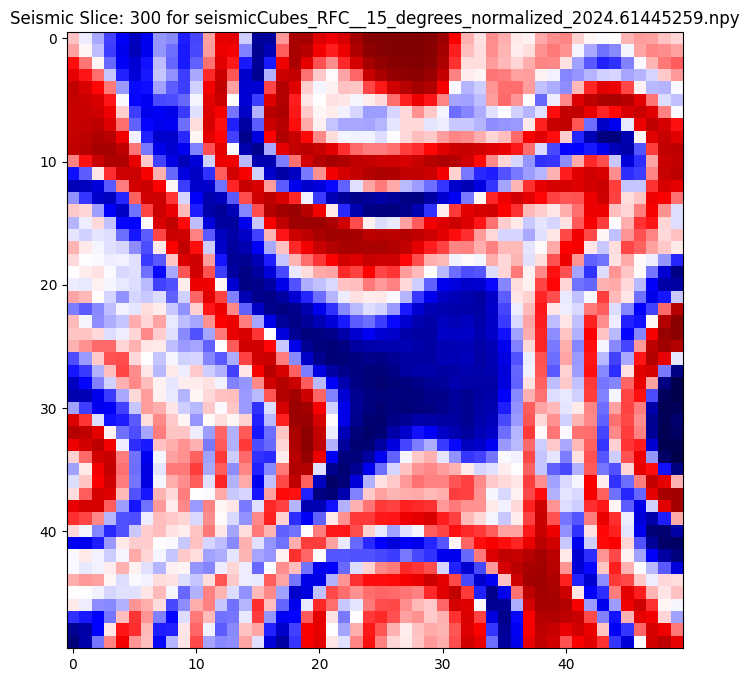

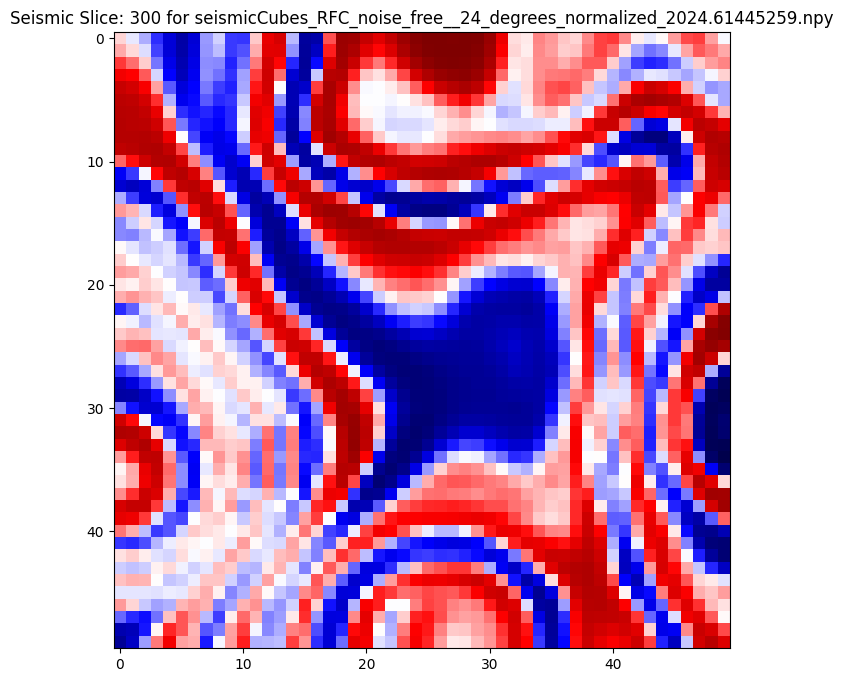

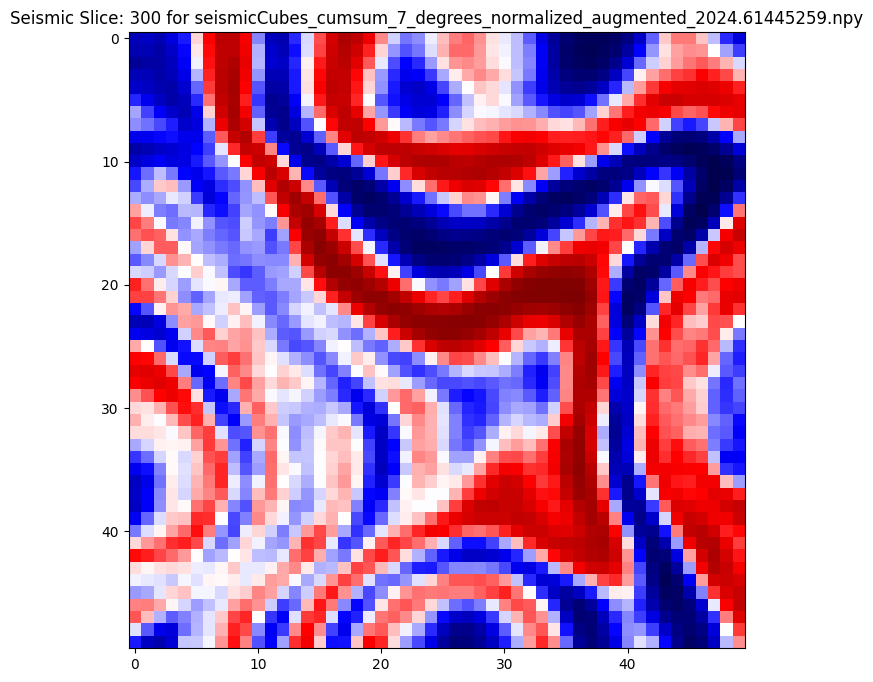

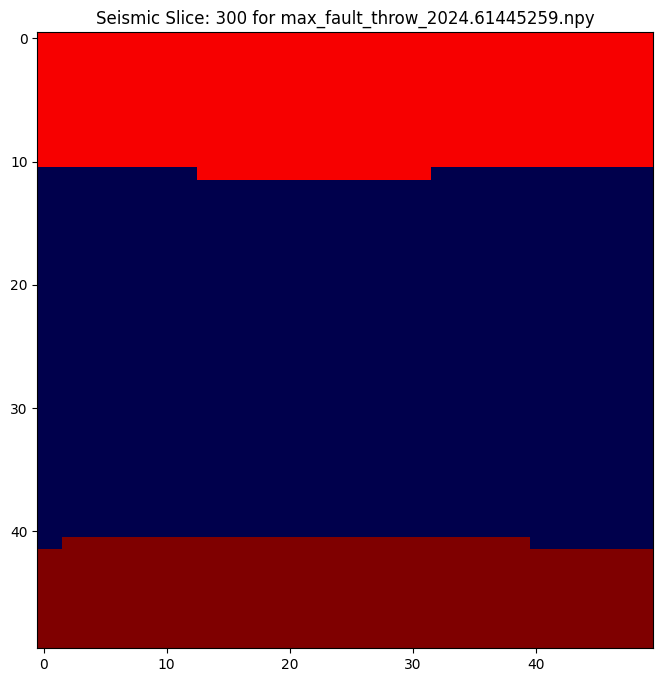

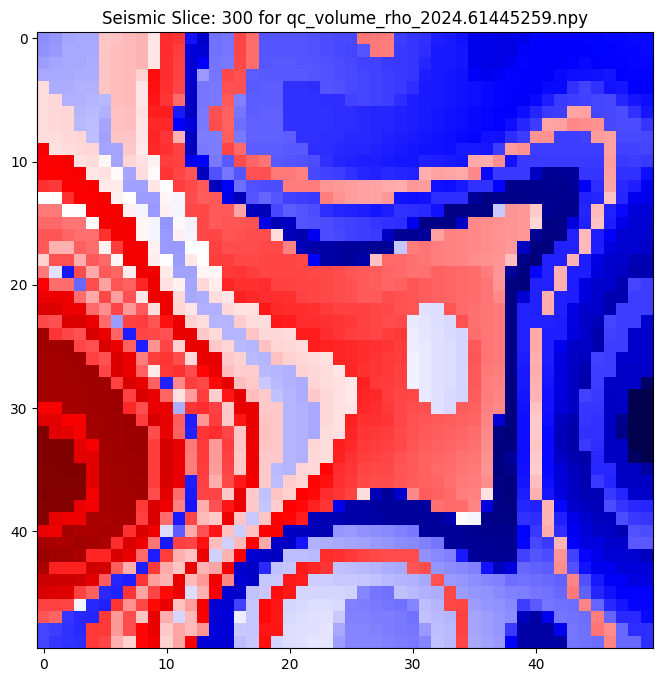

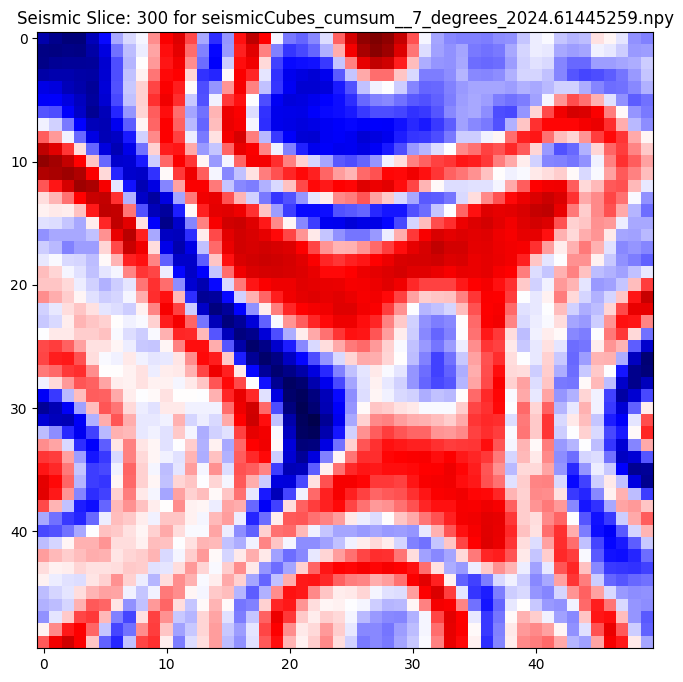

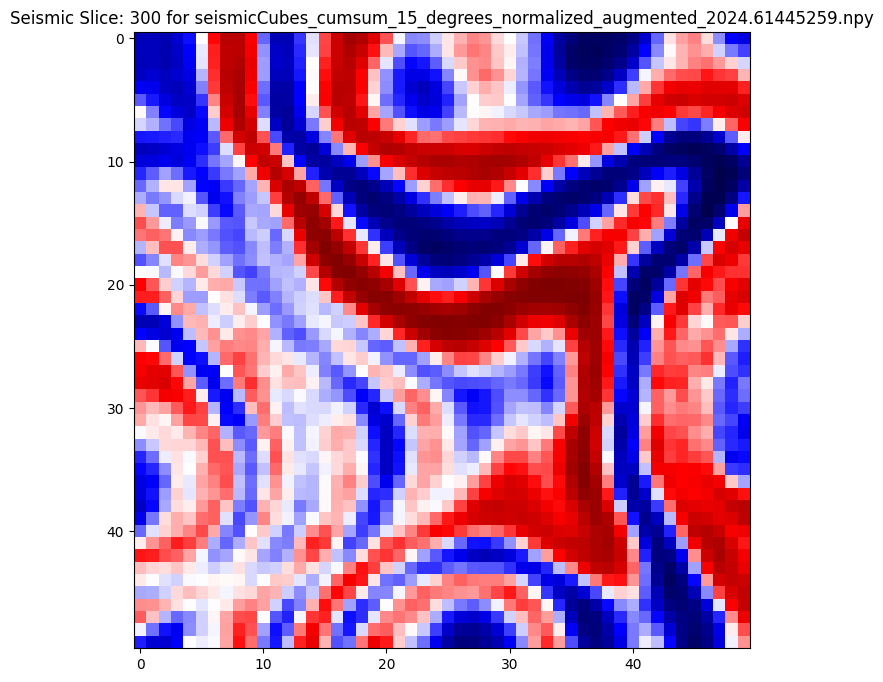

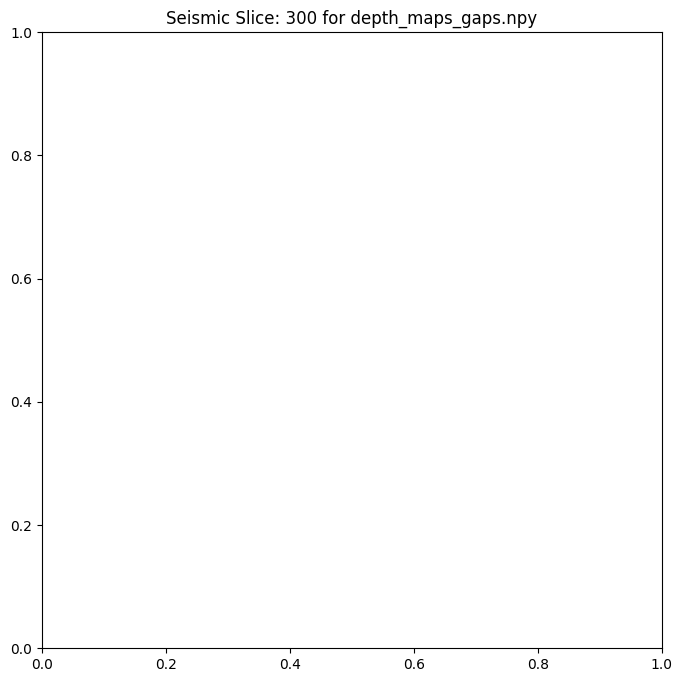

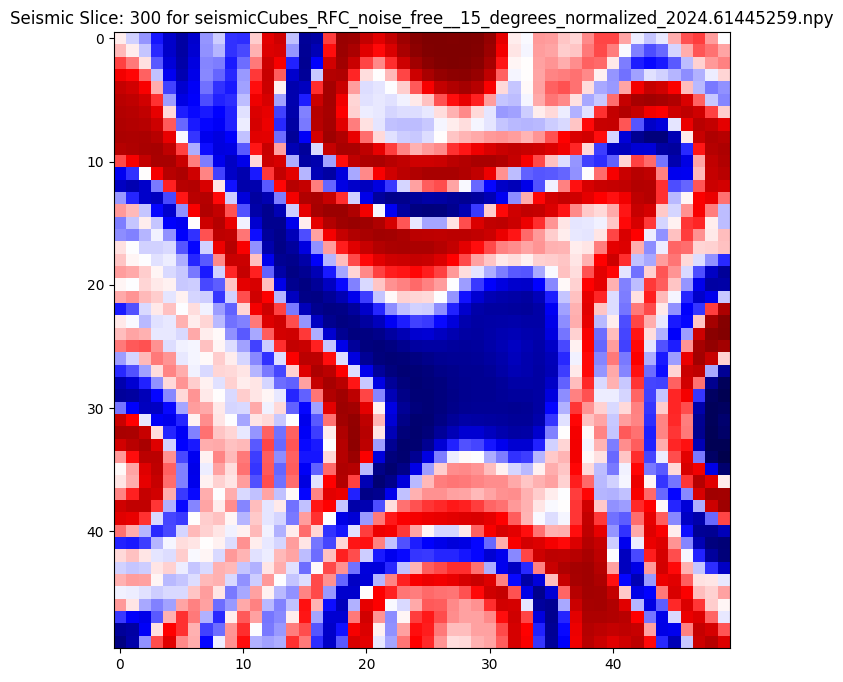

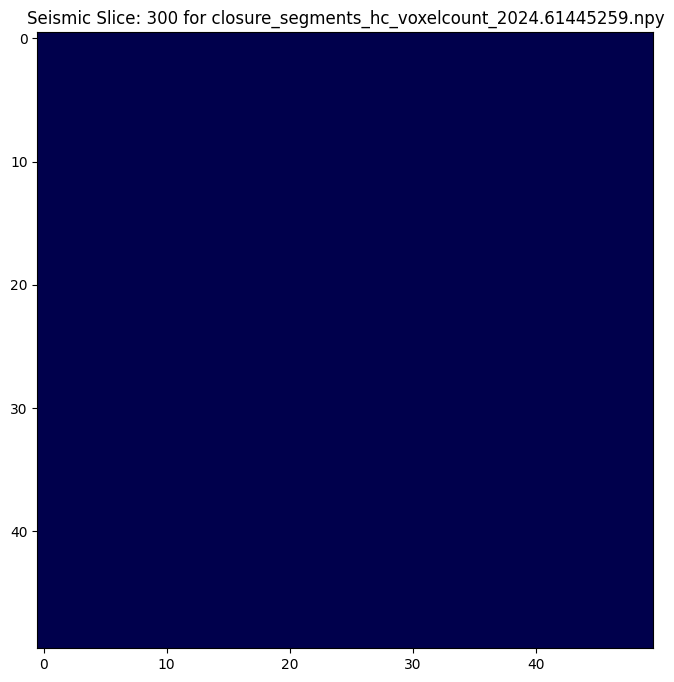

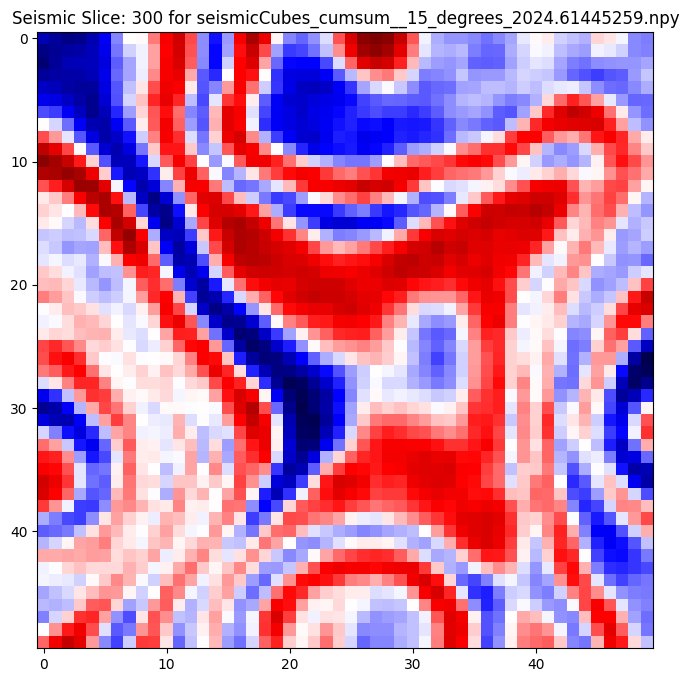

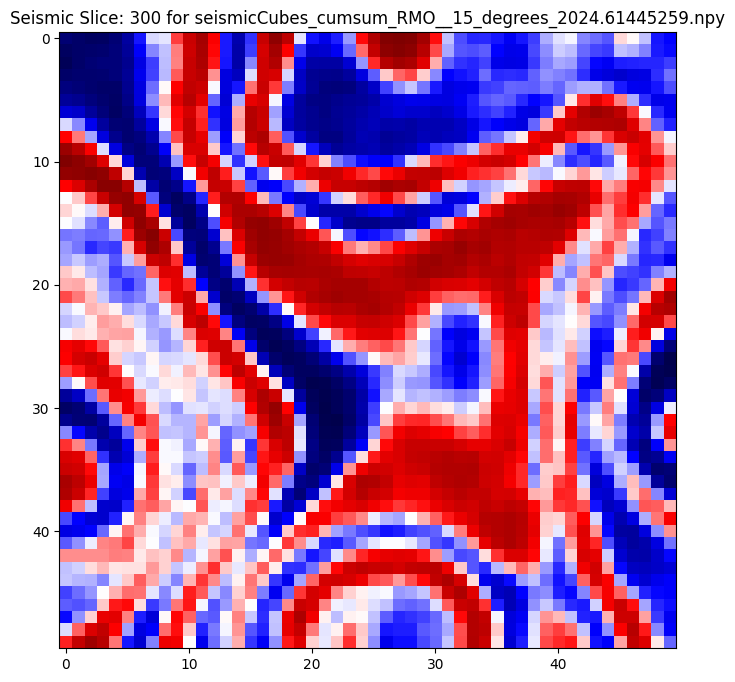

In [36]:
seismic_volumes = list(newest_folder.glob("*.npy"))

for data in seismic_volumes:
    try:
        seismic = np.load(data)
        
        plt.figure(figsize=(8,8))
        plt.title(f"Seismic Slice: 300 for {data.name}")
        plt.imshow(seismic[...,300], cmap=plt.cm.seismic)
        plt.show()
    except:
        pass